In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, make_scorer, precision_score, recall_score

import shap

In [2]:
!pip install phik

In [3]:
!pip install shap

In [4]:
pip install --upgrade scikit-learn matplotlib numpy seaborn shap

  Using cached numpy-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
Note: you may need to restart the kernel to use updated packages.


### –í–≤–µ–¥–µ–Ω–∏–µ
–í –ø—Ä–æ–µ–∫—Ç–µ –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∏—Ö –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, —á—Ç–æ–±—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ—ë —Å–Ω–∏–∂–µ–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ —Ä–∞–∑–±–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –≥—Ä—É–ø–ø—ã, –¥–ª—è –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –±—É–¥–µ—Ç –ø—Ä–∏–¥—É–º–∞–Ω–∞ —Å–≤–æ—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è. –î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç:

1. –í—ã–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É
2. –î–æ–±–∞–≤–∏—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
3. –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
4. –í—ã–±—Ä–∞—Ç—å –º–æ–¥–µ–ª—å, –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â—É—é –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫ –Ω–µ–π
5. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ —Ü–µ–ª–µ–≤–æ–π
6. –†–∞–∑–¥–µ–ª–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç—ã –∏ –ø—Ä–æ–¥—É–º–∞—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –¥–ª—è –∫–∞–∂–¥–æ–≥–æ

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö


In [5]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money =  pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [6]:
market_file.head()

id –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞ –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   

   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   

   –ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  –°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [7]:
market_money.head()

id               –ü–µ—Ä–∏–æ–¥  –í—ã—Ä—É—á–∫–∞
0  215348  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
1  215348        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   3293.1
2  215348     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   4472.0
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   4971.6

In [8]:
market_time.head()

id            –ü–µ—Ä–∏–æ–¥  –º–∏–Ω—É—Ç
0  215348     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     14
1  215348  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     13
2  215349     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     10
3  215349  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     12
4  215350     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13

In [9]:
money.head()

id  –ü—Ä–∏–±—ã–ª—å
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [10]:
df_list = [market_file, market_money, market_time, money]

In [11]:
for i in df_list:
    print(i.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1300 non-null   object 
 2   –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞                          1300 non-null   object 
 3   –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å                   1300 non-null   object 
 4   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å                   1300 non-null   float64
 5   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å                 1300 non-null   int64  
 6   –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å                         1300 non-null   int64  
 7   –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏                    1300 non-null   float64
 8   –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è                 1300 non-null   object 
 9   –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–

–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ –ø–æ—Ä—è–¥–∫–µ, –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç. –ò–∑–º–µ–Ω–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [12]:
def rename_col(df):
        df.columns = df.columns.str.lower()
        df.columns = df.columns.str.replace(' ', '_')

In [13]:
rename_col(market_file)
rename_col(market_money)
rename_col(market_time)
rename_col(money)

–ü—Ä–æ–≤–µ—Ä–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã

In [14]:
for i in df_list:
    print(i.duplicated().sum())

0
0
0
0


In [15]:
for i in df_list:
    for j in i.select_dtypes('object'):
        print(j, i[j].unique(), '\n')
    

–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å ['–°–Ω–∏–∑–∏–ª–∞—Å—å' '–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å'] 

—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ ['–ø—Ä–µ–º–∏—É–º' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç'] 

—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å ['–¥–∞' '–Ω–µ—Ç'] 

–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è ['–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π' '–î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å' '–ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã'
 '–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è' '–ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞'
 '–ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞'] 

–ø–µ—Ä–∏–æ–¥ ['–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü' '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü'] 

–ø–µ—Ä–∏–æ–¥ ['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü'] 



–ï—Å—Ç—å –æ—à–∏–±–∫–∞ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞' –∏ '–ø–µ—Ä–∏–æ–¥'

In [16]:
market_file.loc[market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'] == '—Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç', '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'] = '—Å—Ç–∞–Ω–¥–∞—Ä—Ç'

In [17]:
market_time.loc[market_time['–ø–µ—Ä–∏–æ–¥'] == '–ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü', '–ø–µ—Ä–∏–æ–¥'] = '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü'

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [18]:
for i in df_list:
    display(i.describe())

id  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

id        –≤—ã—Ä—É—á–∫–∞
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

id        –º–∏–Ω—É—Ç
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

id      –ø—Ä–∏–±—ã–ª—å
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

–ó–∞–º–µ—á–µ–Ω –≤—ã–±—Ä–æ—Å –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ '–≤—ã—Ä—É—á–∫–∞'

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ 

In [19]:
def num_hist(df, lst):
    for i in lst:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
        df[i].plot(kind='hist', bins=15, ax=axes[0])
        axes[0].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {df[i].name}')
        axes[0].set_xlabel(df[i].name)
        axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

        df[i].plot(kind='box', ax=axes[1])
        axes[1].set_title(f'Boxplot {df[i].name}')
        
        plt.tight_layout()
        plt.show()

In [20]:
def cat_bar(df, lst):
     for i in lst:
        plt.figure()
        df[i].value_counts().plot(kind='bar')
        plt.title(df[i].name)
        plt.xlabel(df[i].name)
        plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        plt.show()

In [21]:
market_file_num = market_file.select_dtypes(exclude='object').columns
market_file_cat = market_file.select_dtypes('object').columns
market_money_num = market_money.select_dtypes(exclude='object').columns
market_money_cat = market_money.select_dtypes('object').columns
market_time_num = market_time.select_dtypes(exclude='object').columns
market_time_cat = market_time.select_dtypes('object').columns
money_num = money.select_dtypes(exclude='object').columns
money_cat = money.select_dtypes('object').columns

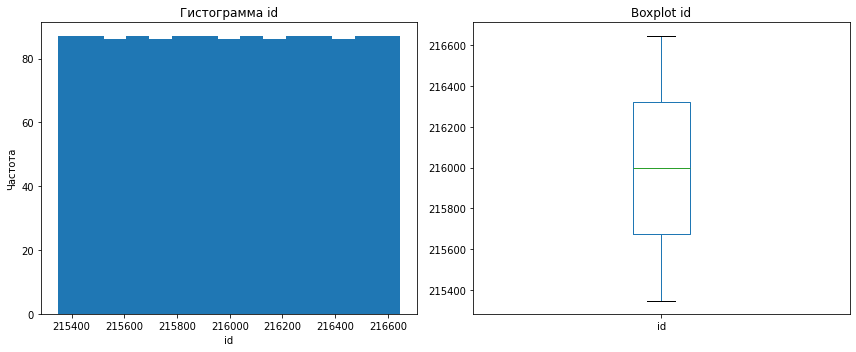

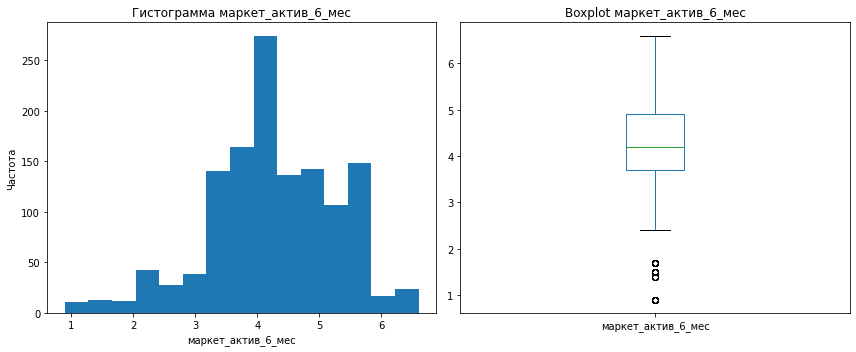

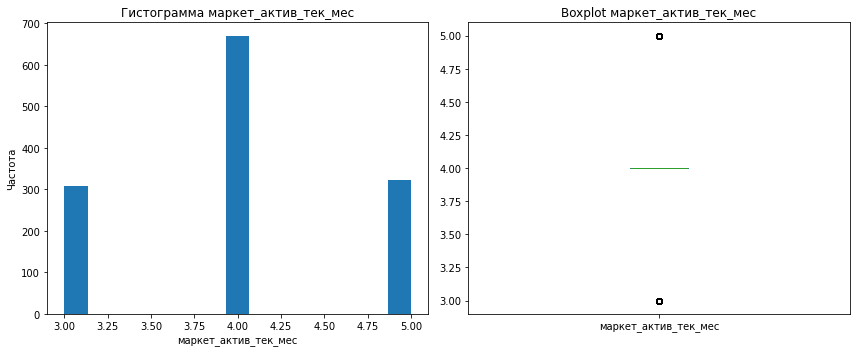

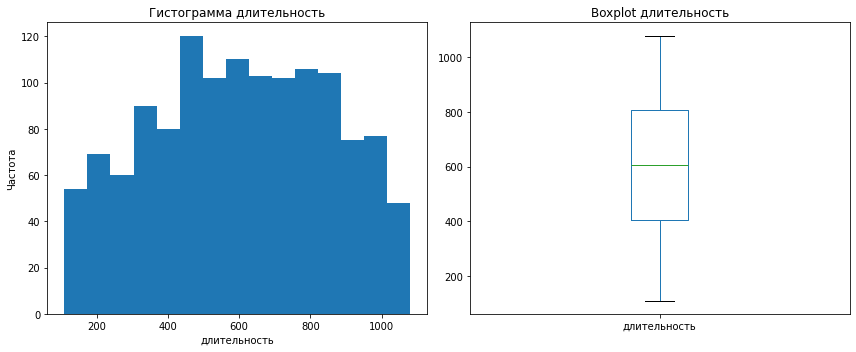

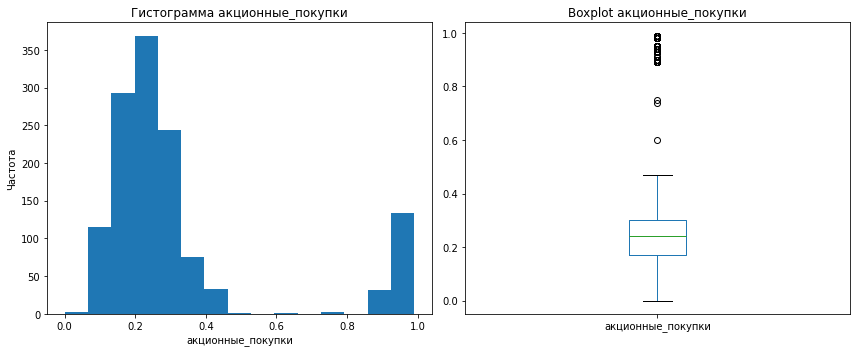

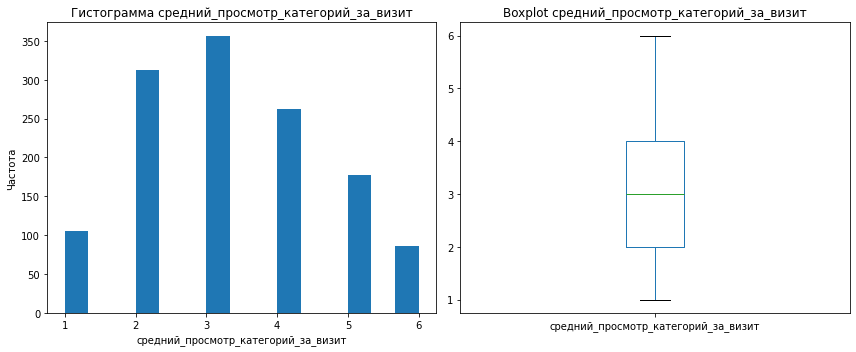

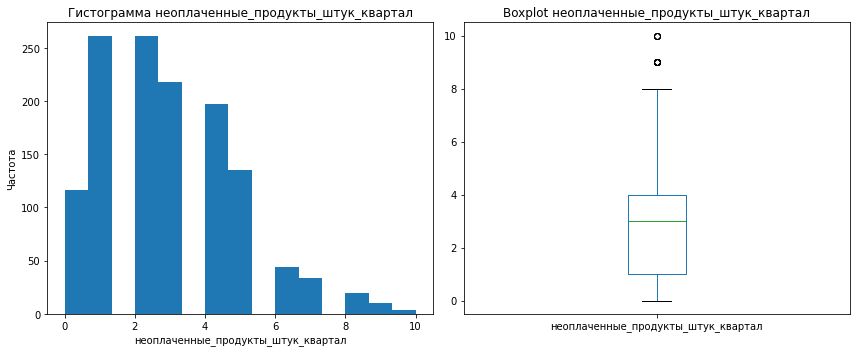

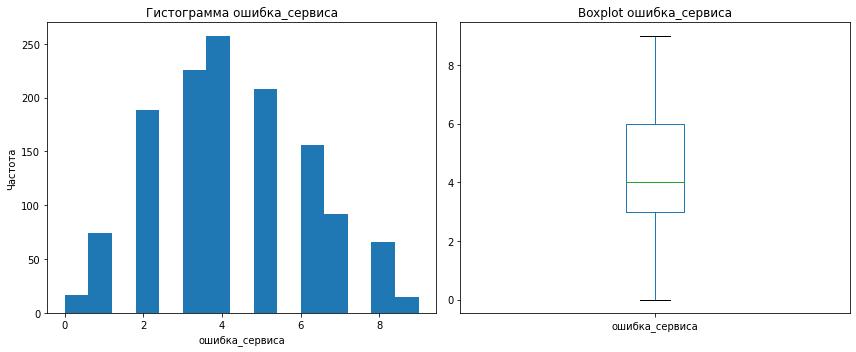

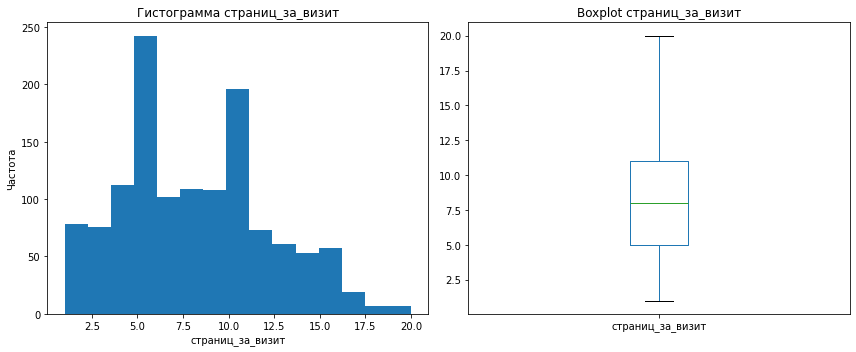

In [22]:
num_hist(market_file, market_file_num)

–ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç. —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫ '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞', –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç

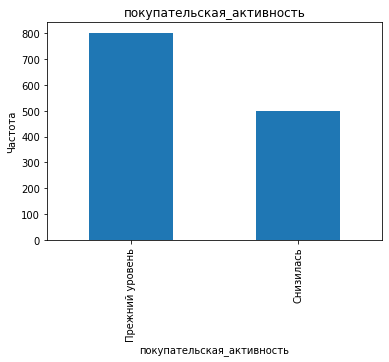

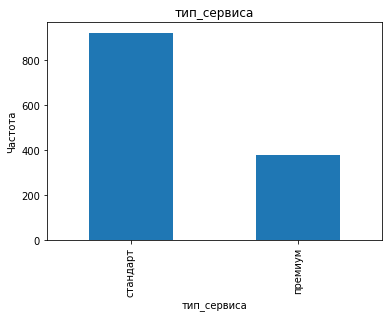

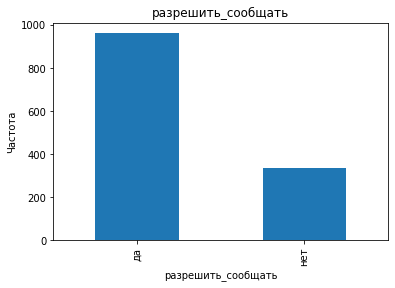

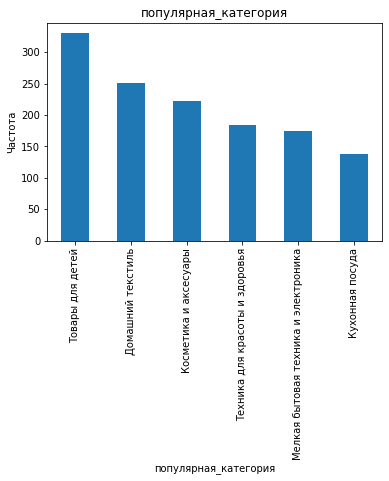

In [23]:
cat_bar(market_file, market_file_cat)

–í —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏–º–µ–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–æ–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

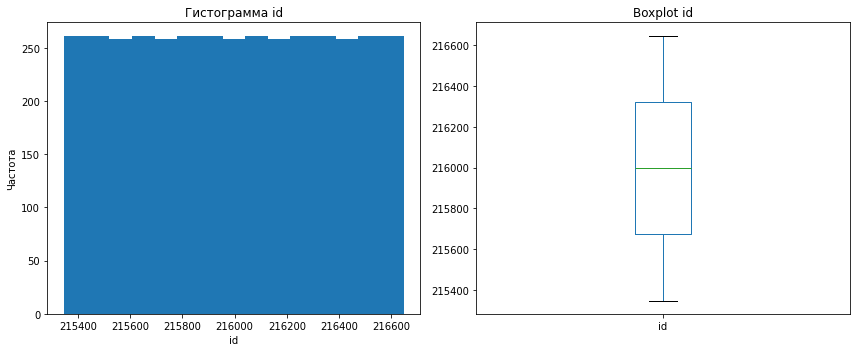

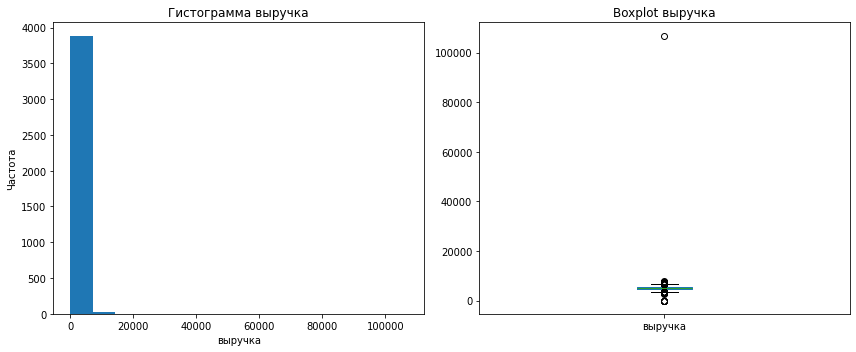

In [24]:
num_hist(market_money, market_money_num)

–£–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å –≤ –≤—ã—Ä—É—á–∫–µ

In [25]:
market_money = market_money.query('–≤—ã—Ä—É—á–∫–∞ < 80000')

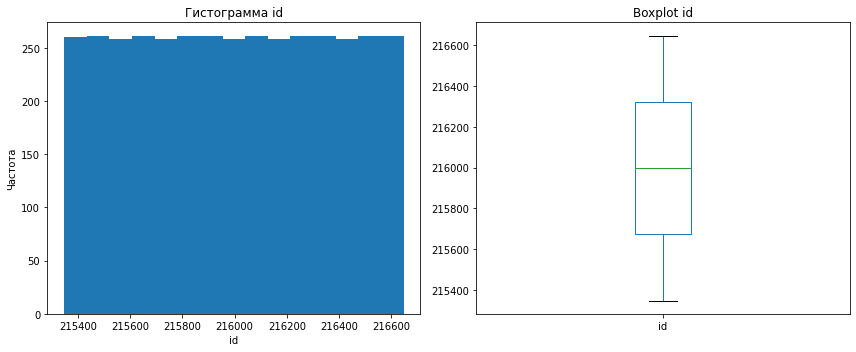

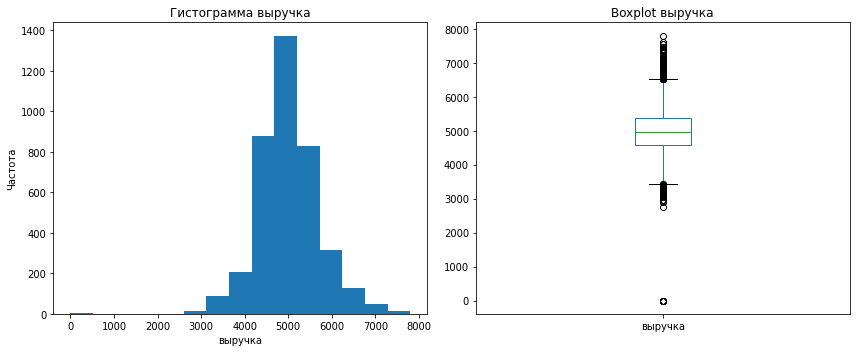

In [26]:
num_hist(market_money, market_money_num)

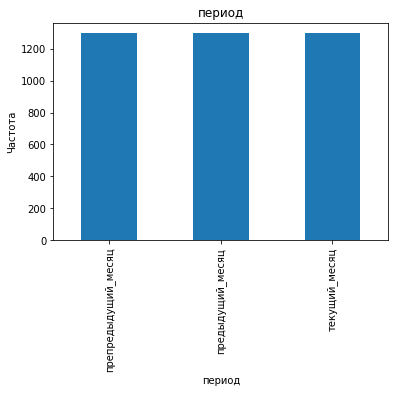

In [27]:
cat_bar(market_money, market_money_cat)

–ü–µ—Ä–∏–æ–¥—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ

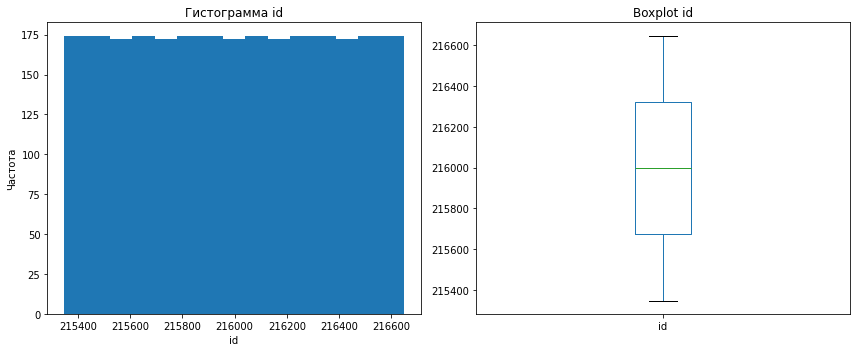

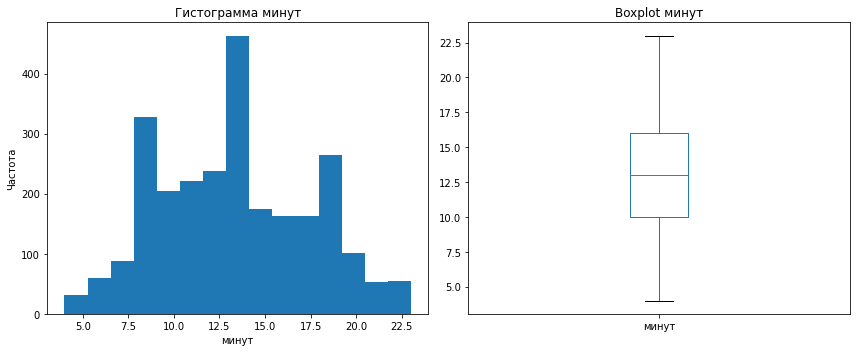

In [28]:
num_hist(market_time, market_time_num)

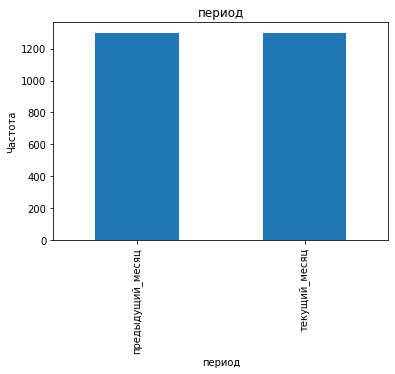

In [29]:
cat_bar(market_time, market_time_cat)

–ü–µ—Ä–∏–æ–¥—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ

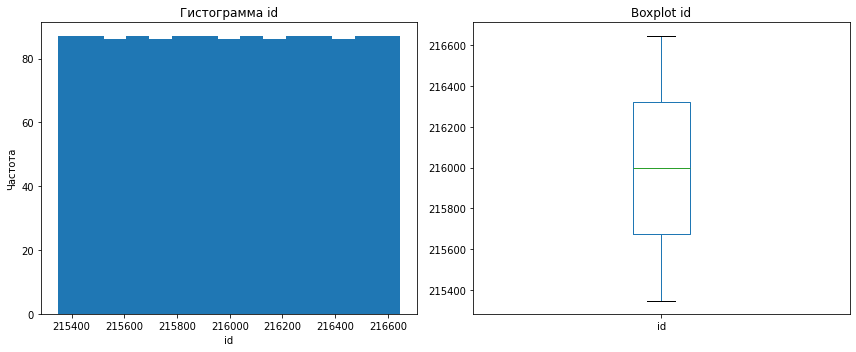

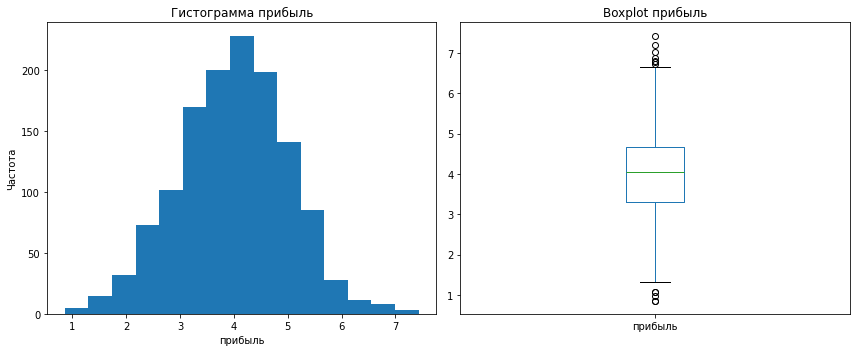

In [30]:
num_hist(money, money_num)

–ü—Ä–∏–±—ã–ª—å –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ê–Ω–æ–º–∞–ª–∏–π –Ω–µ—Ç

## –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü

–ü—Ä–æ—Å—É–º–º–∏—Ä—É–µ–º –∑–∞–Ω—á–µ–Ω–∏—è –≤ market_money –∏ market_time –¥–ª—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö id –∏ –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏–º –∫ market_file –ø–æ id

In [31]:
df = market_file.\
merge(market_money.query('–ø–µ—Ä–∏–æ–¥ == "–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü"').pivot_table(index='id', 
                                                                      values='–≤—ã—Ä—É—á–∫–∞', aggfunc='sum').reset_index().\
     rename(columns={'–≤—ã—Ä—É—á–∫–∞': '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥'}))
df = df.\
merge(market_money.query('–ø–µ—Ä–∏–æ–¥ == "–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü"').pivot_table(index='id', 
                                                                      values='–≤—ã—Ä—É—á–∫–∞', aggfunc='sum').reset_index().\
     rename(columns={'–≤—ã—Ä—É—á–∫–∞': '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥'}))
df = df.\
merge(market_money.query('–ø–µ—Ä–∏–æ–¥ == "—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü"').pivot_table(index='id', 
                                                                      values='–≤—ã—Ä—É—á–∫–∞', aggfunc='sum').reset_index().\
     rename(columns={'–≤—ã—Ä—É—á–∫–∞': '–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π'}))
df = df.\
merge(market_time.query('–ø–µ—Ä–∏–æ–¥ == "–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü"').pivot_table(index='id', 
                                                                      values='–º–∏–Ω—É—Ç', aggfunc='sum').reset_index().\
     rename(columns={'–º–∏–Ω—É—Ç': '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥'}))
df = df.\
merge(market_time.query('–ø–µ—Ä–∏–æ–¥ == "—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü"').pivot_table(index='id', 
                                                                      values='–º–∏–Ω—É—Ç', aggfunc='sum').reset_index().\
     rename(columns={'–º–∏–Ω—É—Ç': '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π'}))

<div class="alert alert-success">
<font size="5"><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞</b></font>



–£—Å–ø–µ—Ö üëç:



 

- –ø—Ä–∞–≤–∏–ª—å–Ω–æ —á—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω pivot_table,  –Ω–∞–≤–µ—Ä–Ω–æ–µ —Å–∞–º—ã–π –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è  –∑–∞–¥–∞—á–∏ —á—Ç–æ —Ç–æ –ø–æ–≤–µ—Ä–Ω—É—Ç—å


 

In [32]:
df.head()

id –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   

   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   

   –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥  –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π  
0              0.0           0.0           3293.1          13             14  
1           4472.0        5216.0           4971.6          12             10  
2           4826.0        5457.5           5058.4           8             13  
3           4793.0        6158.0           6610.4          11             13  
4           4594.0        5807.5           5872.5           8             11

–£–¥–∞–ª–∏–º –∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —Å–æ–≤–µ—Ä—à–∞–ª–∏ –ø–æ–∫—É–ø–∫–∏ –Ω–∏ –≤ –æ–¥–Ω–æ–º –∏–∑ –º–µ—Å—è—Ü–µ–≤

In [33]:
df = df.query('–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥ != 0 and –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π !=0 and –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥ != 0')

## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [34]:
cor = df.drop('id', axis=1).corr(method='spearman')

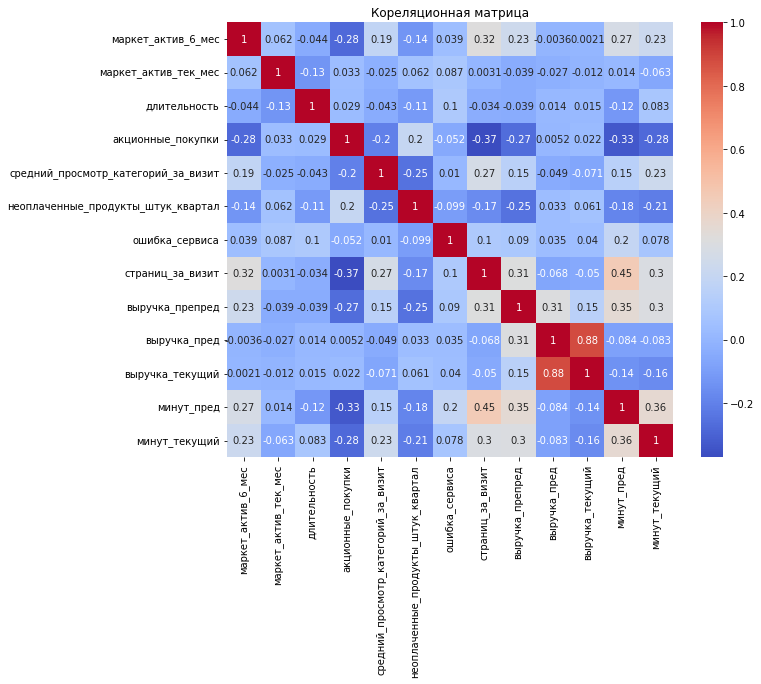

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm');
plt.title('–ö–æ—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞')
plt.show()

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—ã –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å–æ —Å–Ω–∏–∂–∞—é—â–µ–π—Å—è –∏ —Å –ø—Ä–µ–∂–Ω–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é

In [36]:
cor_lower = df.drop('id', axis=1).query('–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å == "–°–Ω–∏–∑–∏–ª–∞—Å—å"').corr(method='spearman')

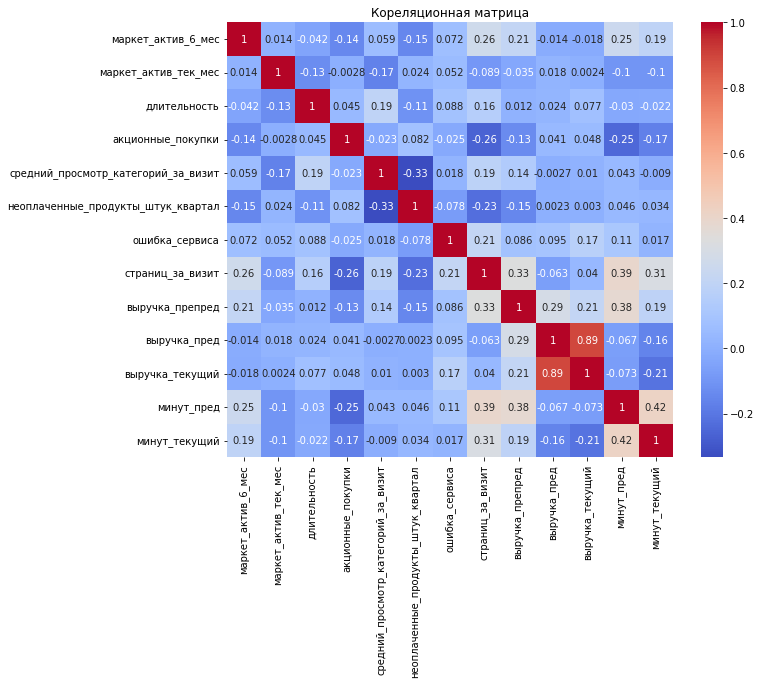

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_lower, annot=True, cmap='coolwarm');
plt.title('–ö–æ—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞')
plt.show()

In [38]:
cor_stable = df.drop('id', axis=1).query('–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å != "–°–Ω–∏–∑–∏–ª–∞—Å—å"').corr(method='spearman')

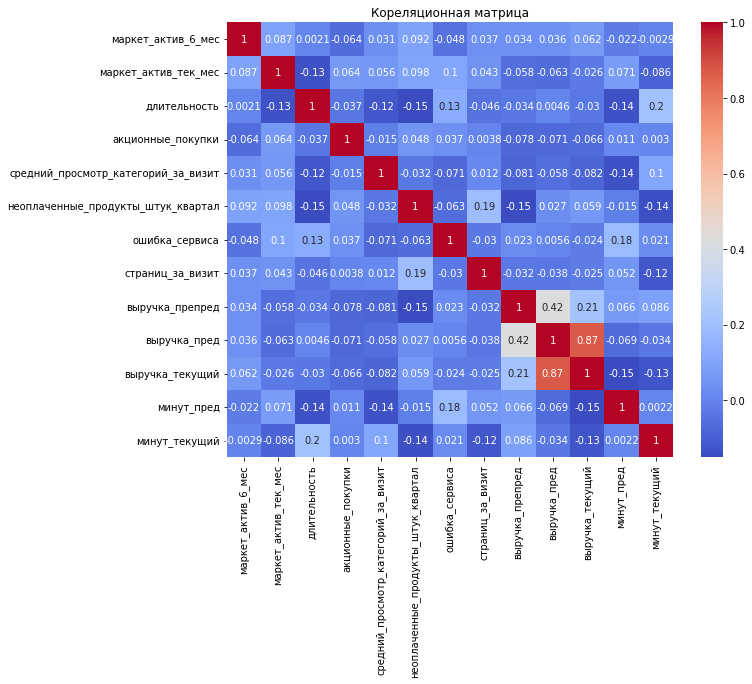

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_stable, annot=True, cmap='coolwarm');
plt.title('–ö–æ—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞')
plt.show()

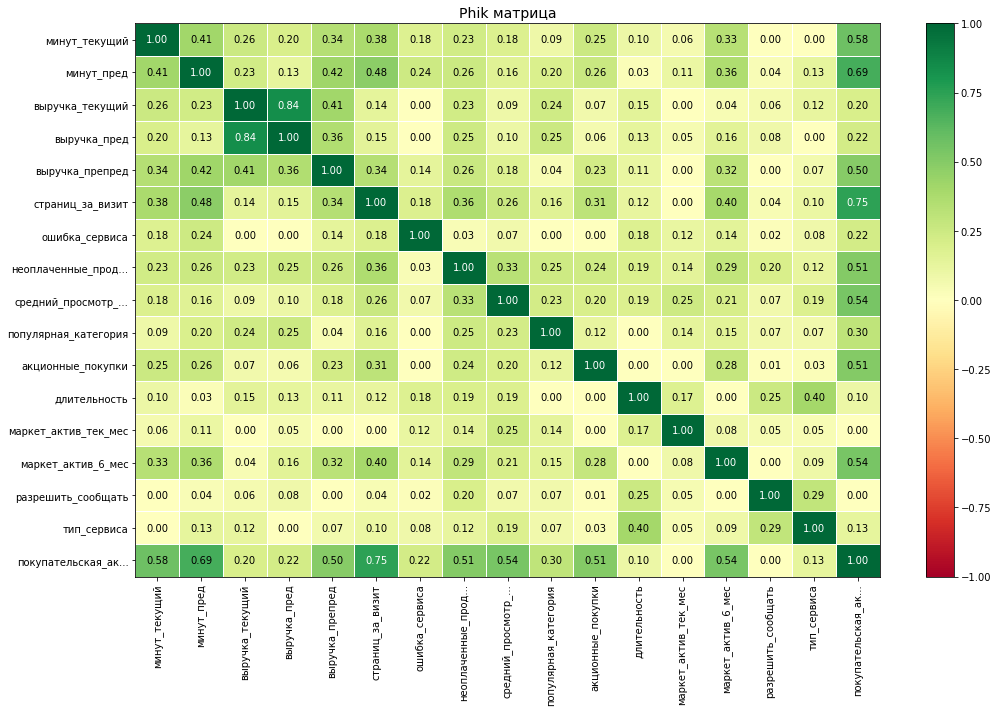

In [40]:
phik_matrix = df.drop('id', axis=1).phik_matrix(interval_cols=df.drop('id', axis=1).select_dtypes(exclude='object').columns)

plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=-1, vmax=1, title="Phik –º–∞—Ç—Ä–∏—Ü–∞", figsize=(15, 10))

plt.show()

–ó–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –≤—ã—Ä—É—á–∫–∏ –∏ –º–∏–Ω—É—Ç –≤ —Ä–∞–∑–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã, –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è. –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –Ω–µ—Ç

## –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–æ–≤

–°–Ω–∞—á–∞–ª–∞ —Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å', 'id'], axis=1),
    df['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'],
    test_size = 0.2, 
    random_state = 42,
    stratify = df['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'])

In [42]:
for i in df.select_dtypes('object'):
    print(i, df[i].unique())

–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å ['–°–Ω–∏–∑–∏–ª–∞—Å—å' '–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å']
—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ ['–ø—Ä–µ–º–∏—É–º' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç']
—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å ['–¥–∞' '–Ω–µ—Ç']
–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è ['–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π' '–î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å' '–ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã'
 '–ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞' '–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è'
 '–ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞']


In [43]:
ohe_columns = ['—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å', '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']
ord_columns = ['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞']
num_columns = X_train.select_dtypes(exclude='object').columns

–°–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω—ã

In [44]:
ohe_pipe = Pipeline(
    [
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
    )

ord_pipe = Pipeline(
    [
     ('ord',  OrdinalEncoder(
                categories=[
                    ['—Å—Ç–∞–Ω–¥–∞—Ä—Ç', '–ø—Ä–µ–º–∏—É–º'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        )
    ]
)

In [45]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [46]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=42))
])

In [47]:
param_distributions = [
    {
        'preprocessor__num': [MinMaxScaler(), StandardScaler()],
        'models': [LogisticRegression(random_state=42)],
        'models__C': [0.01, 0.1, 1, 10], 
        'models__penalty': ['l1', 'l2'],
        'models__solver': ['liblinear']
    },
    {
        'preprocessor__num': [MinMaxScaler(), StandardScaler()],
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 12),
        'models__min_samples_split': range(2, 10)
    },
    {
        'preprocessor__num': [MinMaxScaler(), StandardScaler()],
        'models': [SVC()],
        'models__C': [0.01, 0.1, 1, 10],  
        'models__kernel': ['linear', 'rbf'],
    },
     {
        'preprocessor__num': [MinMaxScaler(), StandardScaler()],
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [2, 3, 5, 10, 100],  
    }
]

In [48]:
recall_scorer = make_scorer(recall_score, pos_label='–°–Ω–∏–∑–∏–ª–∞—Å—å')

In [49]:
random_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions,
    n_iter=200, 
    cv=5, 
    scoring=recall_scorer, 
    n_jobs=-1, 
    random_state=35
)

In [50]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 23.1 s, sys: 267 ms, total: 23.3 s
Wall time: 23.4 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å',
                                                                                '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalEncoder(categories=[['—Å—Ç–∞–Ω–¥–∞—Ä—Ç',
                                                                                                                            '–ø—Ä–µ–º–∏—É–º']],
                                                                                                               handle_unknown=...
                                        {'models': [SVC()],
                                         'models__C': [0.01, 0.1, 1, 10],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [MinMaxScaler(),
                                                               StandardScaler()]},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': [2, 3, 5, 10,
                                                                 100],
                                         'preprocessor__num': [MinMaxScaler(),
                                                               StandardScaler()]}],
                   random_state=35,
                   scoring=make_scorer(recall_score, response_method='predict', pos_label=–°–Ω–∏–∑–∏–ª–∞—Å—å))

In [51]:
random_search.classes_

array(['–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å', '–°–Ω–∏–∑–∏–ª–∞—Å—å'], dtype=object)

In [52]:
random_search.best_params_

{'preprocessor__num': StandardScaler(),
 'models__solver': 'liblinear',
 'models__penalty': 'l1',
 'models__C': 0.01,
 'models': LogisticRegression(random_state=42)}

In [53]:
f'–ú–µ—Ç—Ä–∏–∫–∞ roc_auc —É –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ - {random_search.best_score_}'

'–ú–µ—Ç—Ä–∏–∫–∞ roc_auc —É –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ - 0.8177215189873419'

–õ—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å l1 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º C, —Ä–∞–≤–Ω—ã–º 0.01

In [54]:
model = random_search.best_estimator_.named_steps['models']

In [55]:
X_test_transformed = random_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

In [56]:
y_pred = model.predict(X_test_transformed)

In [57]:
accuracy_score(y_test, y_pred)

0.8692307692307693

In [58]:
recall_score(y_test, y_pred, pos_label='–°–Ω–∏–∑–∏–ª–∞—Å—å')

0.8484848484848485

–ú–µ—Ç—Ä–∏–∫–∏ —Ö–æ—Ä–æ—à–∏–µ

## –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ SHAP

In [59]:
feature_names = random_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['ohe__—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å_–Ω–µ—Ç',
       'ohe__–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è_–ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã',
       'ohe__–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è_–ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞',
       'ohe__–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è_–ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞',
       'ohe__–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è_–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è',
       'ohe__–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è_–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π', 'ord__—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
       'num__–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å', 'num__–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å',
       'num__–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å', 'num__–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
       'num__—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
       'num__–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª', 'num__–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞',
       'num__—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–

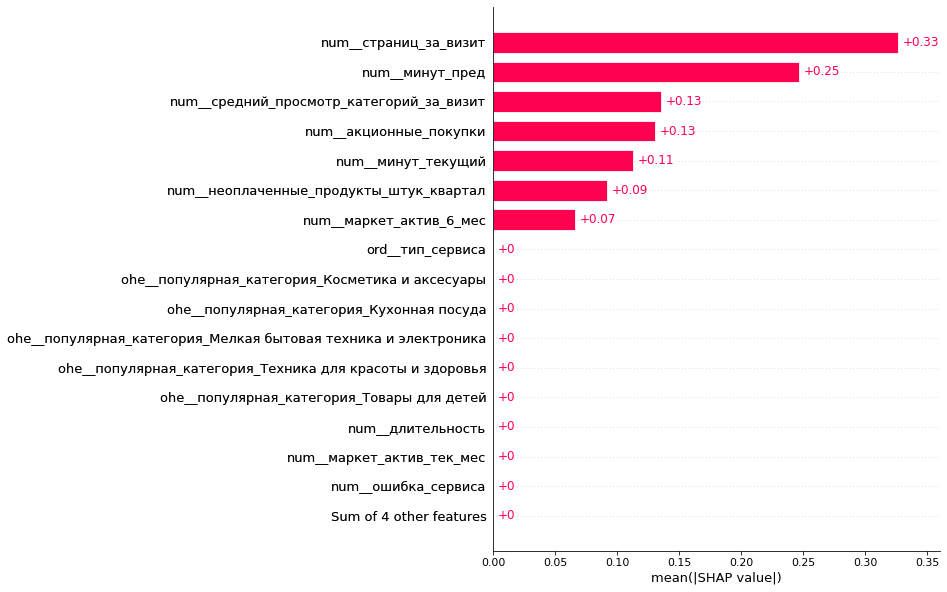

In [60]:
explainer = shap.LinearExplainer(model, X_test_transformed, feature_names=feature_names)
shap_values = explainer(X_test_transformed)
shap.plots.bar(shap_values, max_display=17)

–ù–∞–∏–±–æ–ª—å—à–µ–µ –≤–ª–∏—è–Ω–∏–µ –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ "—Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç", "—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç" –∏ "–º–∏–Ω—É—Ç". –ù—É–ª–µ–≤–æ–µ –≤–ª–∏—è–Ω–∏–µ –∏–º–µ—é—Ç –≤—ã—Ä—É—á–∫–∞ –∑–∞ —Ç–µ–∫—É—â–∏–π –º–µ—Å—è—Ü, "–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤" –∑–∞ —Ç–µ–∫—É—â–∏–π –º–µ—Å—è—Ü –∏ "—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å", –∞ —Ç–∞–∫–∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

1. –ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü –ø–µ—Ä–µ—Å—Ç–∞–ª–∞ –≤–ª–∏—è—Ç—å –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫—É—é, –ø–æ—ç—Ç–æ–º—É –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –ø–µ—Ä–µ—Å–º–æ—Ç—Ä–µ—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏—é
2. –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫—É—é –≤–ª–∏—è—é—Ç —Ñ–∞–∫—Ç–æ—Ä—ã, –∑–∞–¥–µ—Ä–∂–∏–≤–∞—é—â–∏–µ –∏—Ö –Ω–∞ —Å–∞–π—Ç–µ. –ú–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω—É—é —Å–∏—Å—Ç–µ–º—É, —á—Ç–æ –ø–æ–º–æ–∂–µ—Ç –ø–æ–≤—ã—à–∞—Ç—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å

## –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π

–î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –±—É–¥—É—Ç —Å–æ—Å—Ç–∞–≤–ª—è—Ç—å—Å—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–Ω–∏–∂–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –ø—Ä–∏–±—ã–ª—å

In [61]:
model.classes_

array(['–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å', '–°–Ω–∏–∑–∏–ª–∞—Å—å'], dtype=object)

In [62]:
df_transformed = random_search.best_estimator_.named_steps['preprocessor'].\
transform(df.drop(['id', '–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'], axis=1))

In [63]:
proba = model.predict_proba(df_transformed)

In [64]:
df['–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏'] = proba[:, 1]

In [65]:
df = df.merge(money)

In [66]:
df.head()

id –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  \
0  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
2  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
3  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
4  215353                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   

   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
1    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
2     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   
4    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    4   

   –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥  –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π  \
0           4472.0        5216.0           4971.6          12             10   
1           4826.0        5457.5           5058.4           8             13   
2           4793.0        6158.0           6610.4          11             13   
3           4594.0        5807.5           5872.5           8             11   
4           5124.0        4738.5           5388.5          10             10   

   –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏  –ø—Ä–∏–±—ã–ª—å  
0                         0.679378     4.16  
1                         0.558010     3.13  
2                         0.680300     4.87  
3                         0.803271     4.21  
4                         0.633287     3.95

In [67]:
def num_hist_group(df1, df2, lst):
    for i in lst:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
        df1[i].plot(kind='hist', bins=15, ax=axes[0], alpha=0.7)
        axes[0].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {df1[i].name} –≥—Ä—É–ø–ø—ã')
        axes[0].set_xlabel(df1[i].name)
        axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

        df2[i].plot(kind='hist', bins=15, ax=axes[1], alpha=0.7)
        axes[1].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {df2[i].name}')
        axes[1].set_xlabel(df2[i].name)
        axes[1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        
        plt.tight_layout()
        plt.show()

In [74]:


def cat_bar_group(df1, df2, lst):
    for i in lst:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
        df1[i].value_counts().plot(kind='bar', ax=axes[0])
        axes[0].set_title(f'{df1[i].name} –≥—Ä—É–ø–ø—ã')
        axes[0].set_xlabel(df1[i].name)
        axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

        df2[i].value_counts().plot(kind='bar', ax=axes[1])
        axes[1].set_title(f'–æ–±—â–∏–π {df2[i].name}')
        axes[1].set_xlabel(df2[i].name)
        axes[1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        
        plt.tight_layout()
        plt.show()


–í—ã–¥–µ–ª–∏–º —Å–µ–≥–º–µ–Ω—Ç—ã
1. –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –¥–æ–ª–µ–π –ø–æ–∫—É–ø–æ–∫ –ø–æ –∞–∫—Ü–∏–∏ –∏ –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Å–Ω–∏–∂–µ–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.



In [75]:
group1 = df.query('–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏ > 0.85 and –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ > 0.7')

In [76]:
group1.describe()

id  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
count     110.000000          110.000000            110.000000    110.000000   
mean   215550.500000            3.423636              3.945455    600.772727   
std       121.451825            1.040195              0.675065    218.622193   
min    215352.000000            0.900000              3.000000    167.000000   
25%    215449.000000            3.000000              3.250000    458.000000   
50%    215535.500000            3.800000              4.000000    600.000000   
75%    215644.750000            4.100000              4.000000    778.250000   
max    215910.000000            5.600000              5.000000   1064.000000   

       –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
count         110.000000                           110.000000   
mean            0.943000                             2.472727   
std             0.034122                             1.114616   
min             0.890000                             1.000000   
25%             0.930000                             2.000000   
50%             0.940000                             2.000000   
75%             0.980000                             3.000000   
max             0.990000                             6.000000   

       –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  \
count                          110.000000      110.000000        110.000000   
mean                             4.318182        3.909091          3.963636   
std                              2.441731        1.825133          1.579265   
min                              0.000000        1.000000          1.000000   
25%                              3.000000        3.000000          3.000000   
50%                              4.000000        3.500000          4.000000   
75%                              6.000000        5.000000          5.000000   
max                             10.000000        8.000000          8.000000   

       –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥  \
count       110.000000    110.000000       110.000000   110.00000   
mean       4604.900000   4936.995455      5247.258182     9.70000   
std         215.884396    843.491231       896.398937     2.32872   
min        4098.000000   3146.000000      3232.200000     5.00000   
25%        4443.250000   4401.250000      4611.025000     8.00000   
50%        4626.000000   5072.000000      5250.900000    10.00000   
75%        4770.000000   5563.125000      5778.375000    11.00000   
max        4990.000000   6716.500000      7799.400000    16.00000   

       –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π  –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏     –ø—Ä–∏–±—ã–ª—å  
count     110.000000                       110.000000  110.000000  
mean        9.927273                         0.806327    3.888818  
std         2.325405                         0.047384    0.915443  
min         4.000000                         0.701775    1.630000  
25%         8.000000                         0.776296    3.245000  
50%        10.000000                         0.810469    4.010000  
75%        11.000000                         0.839302    4.427500  
max        17.000000                         0.901797    6.730000

In [77]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes('object')

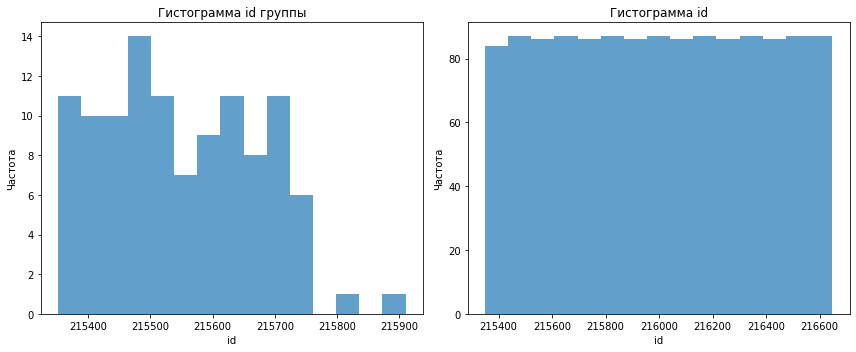

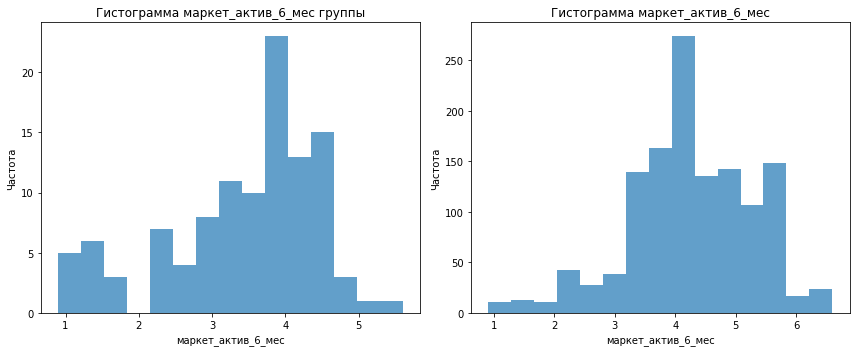

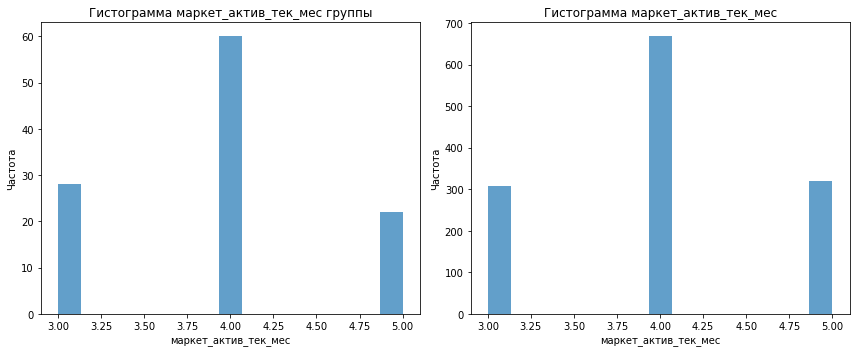

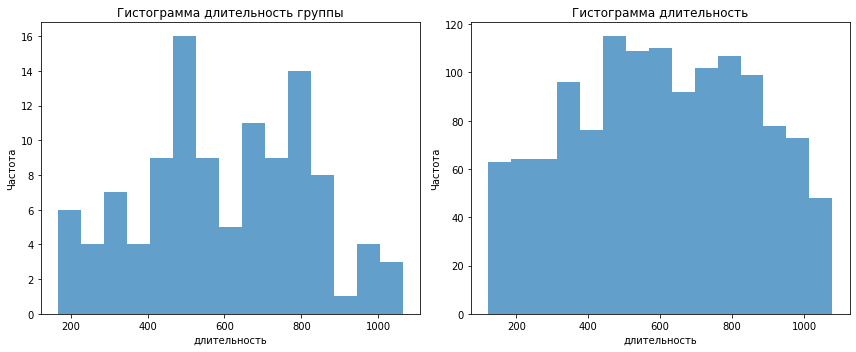

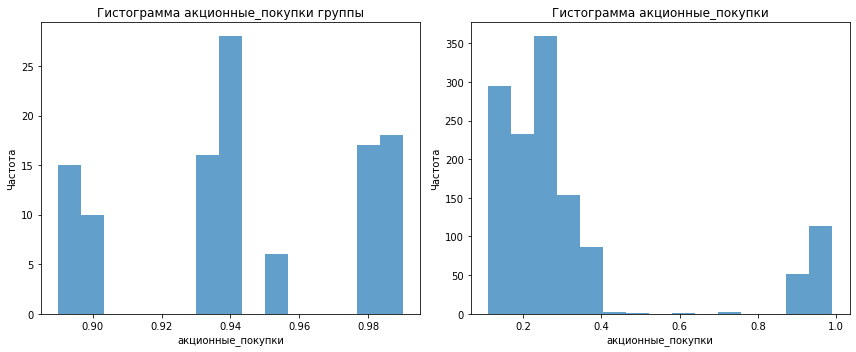

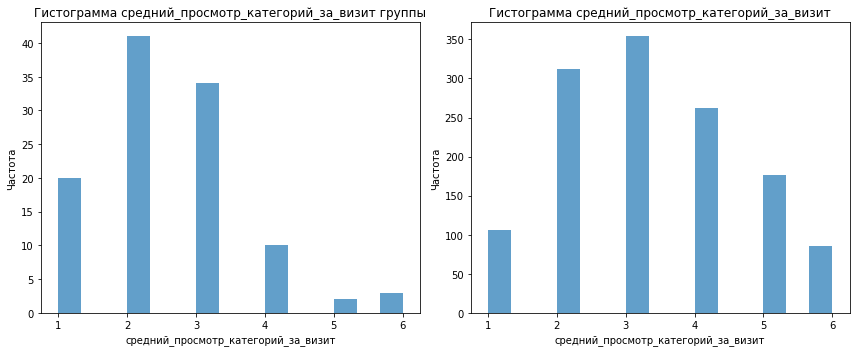

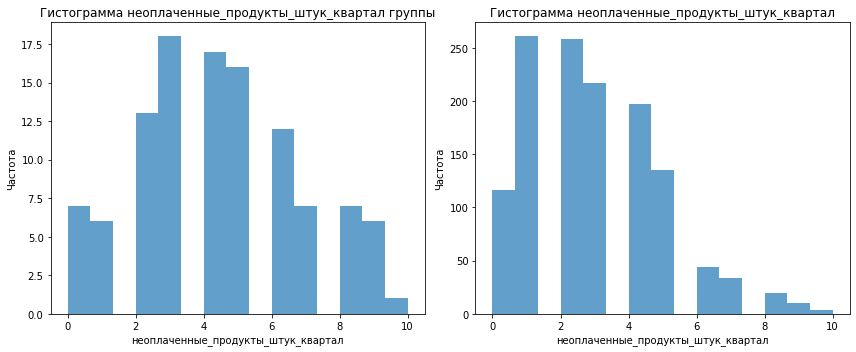

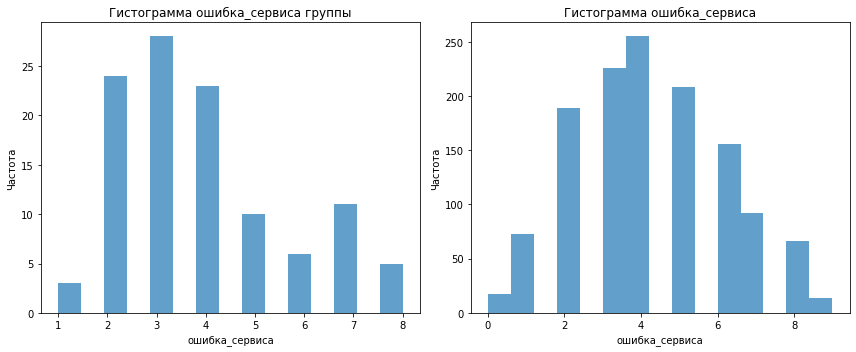

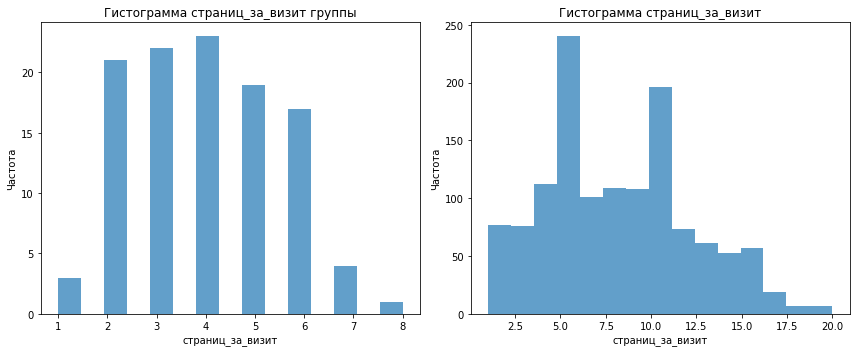

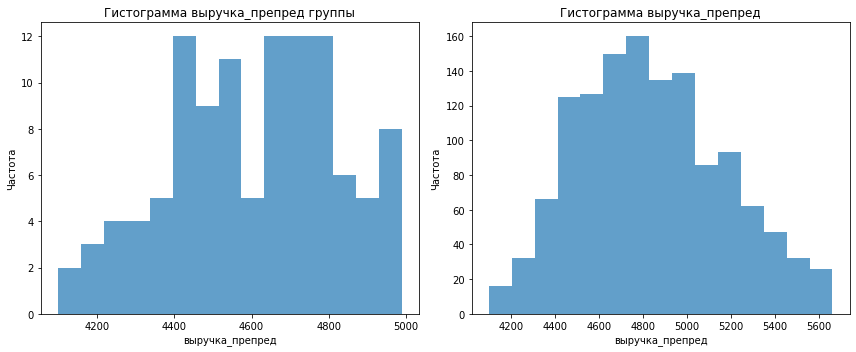

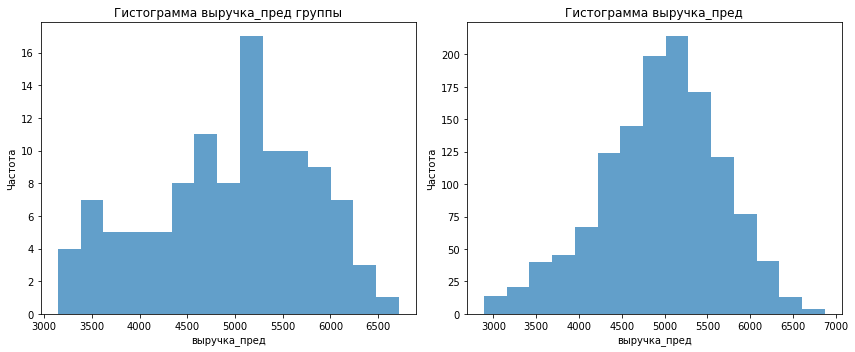

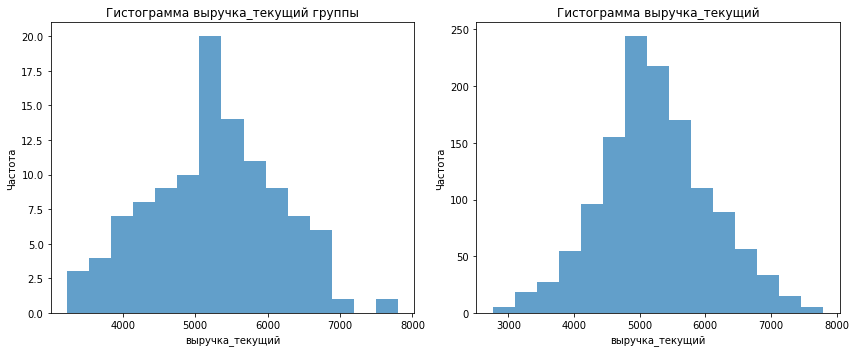

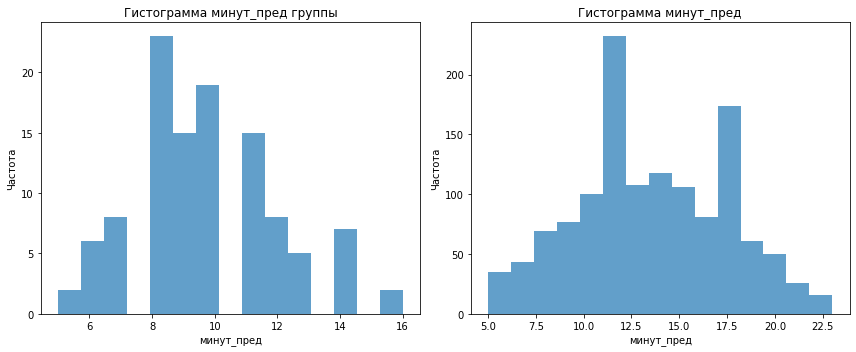

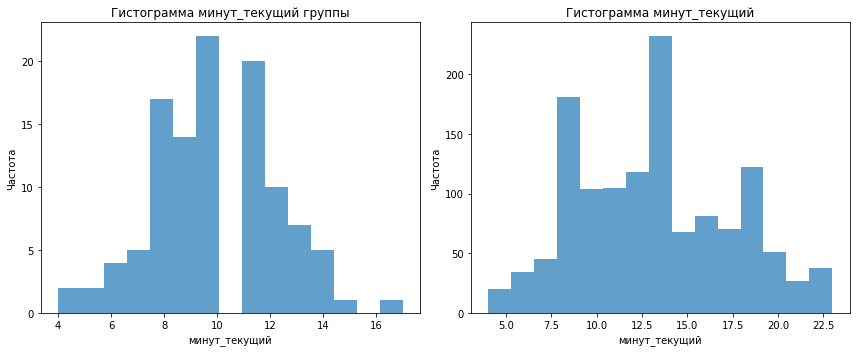

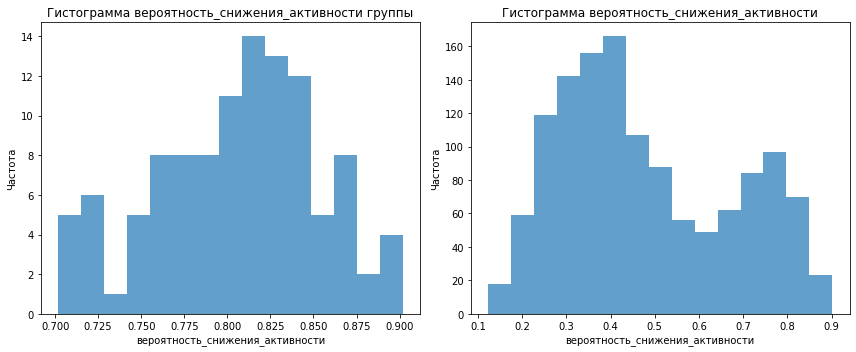

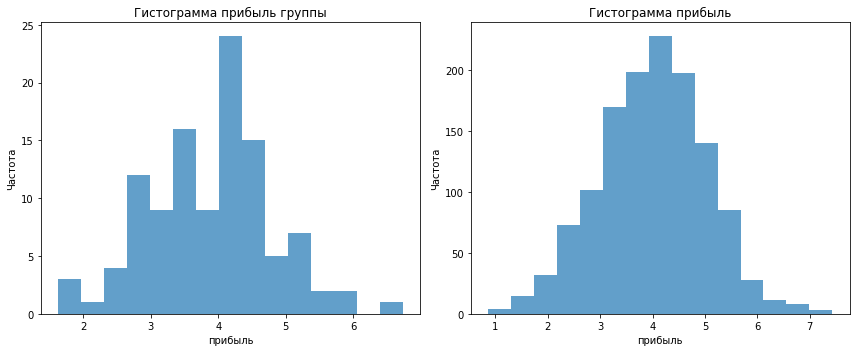

In [78]:
num_hist_group(group1, df, df_num)

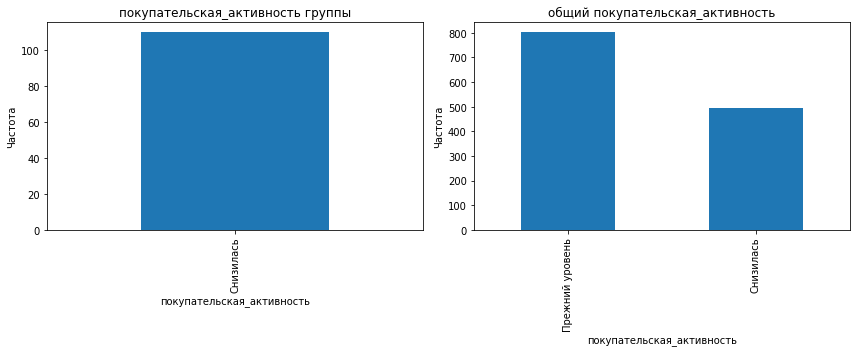

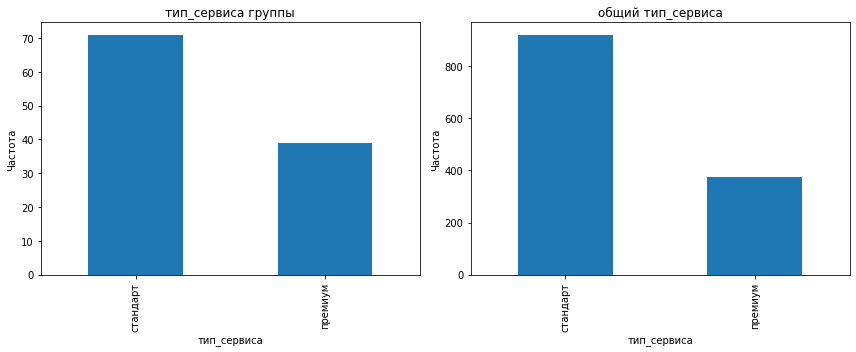

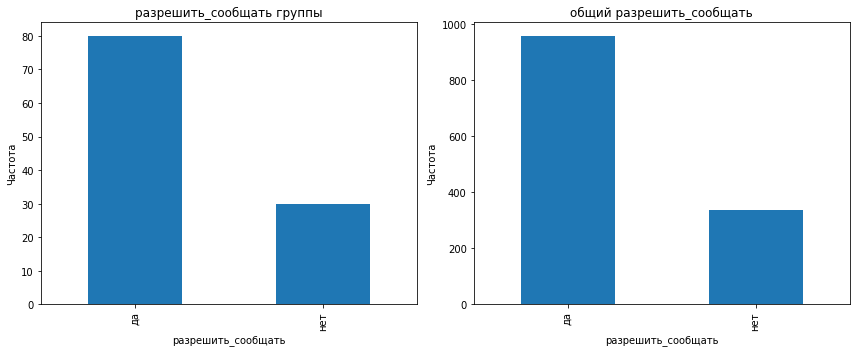

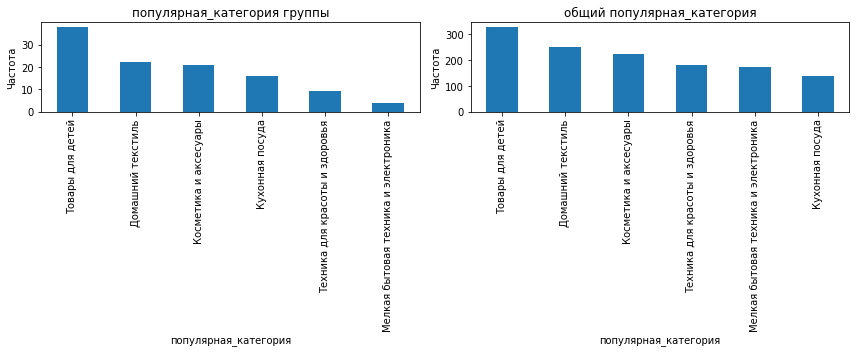

In [79]:
cat_bar_group(group1, df, df_cat)

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≥—Ä—É–ø–ø—ã –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç –º–µ–Ω—å—à–µ —Å—Ç—Ä–∞–Ω–∏—Ü –∏ —Ç–æ–≤–∞—Ä–æ–≤, –∫–æ–≥–¥–∞ –ø–æ–ª—å–∑—É—é—Ç—è —Å–∞–π—Ç–æ–º. –ó–∞–≤–ª–µ—á—å –∏—Ö –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é —É–≤–µ–ª–∏—á–µ–Ω–∏—è –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ "—Ç–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π", —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ —è–≤–ª—è–µ—Ç—Å—è —Å–∞–º–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ–π —É –≥—Ä—É–ø–ø—ã

2. –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫—É–ø–∞—é—Ç —Ç–æ–ª—å–∫–æ —Ç–µ—Ö–Ω–∏–∫—É, —Ç–æ –µ—Å—Ç—å —Ç–æ–≤–∞—Ä—ã —Å –¥–ª–∏–Ω–Ω—ã–º –∂–∏–∑–Ω–µ–Ω–Ω—ã–º —Ü–∏–∫–ª–æ–º.

In [80]:
group2 = df.query('–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è == "–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è"')

In [81]:
group2.describe()

id  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
count     182.000000          182.000000            182.000000    182.000000   
mean   216072.203297            4.351648              4.027473    601.395604   
std       357.424624            0.956844              0.700681    258.265993   
min    215361.000000            0.900000              3.000000    129.000000   
25%    215825.750000            3.900000              4.000000    384.750000   
50%    216074.000000            4.300000              4.000000    621.000000   
75%    216367.500000            4.900000              5.000000    826.750000   
max    216647.000000            6.600000              5.000000   1072.000000   

       –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
count         182.000000                           182.000000   
mean            0.315659                             3.318681   
std             0.255761                             1.361500   
min             0.110000                             1.000000   
25%             0.160000                             2.000000   
50%             0.240000                             3.000000   
75%             0.300000                             4.000000   
max             0.990000                             6.000000   

       –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  \
count                          182.000000      182.000000        182.000000   
mean                             2.626374        4.258242          8.906593   
std                              2.208213        2.006705          3.775036   
min                              0.000000        0.000000          1.000000   
25%                              1.000000        3.000000          6.000000   
50%                              2.000000        4.000000          9.000000   
75%                              3.000000        6.000000         11.000000   
max                             10.000000        9.000000         19.000000   

       –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥  \
count       182.000000    182.000000       182.000000   182.00000   
mean       4837.637363   4660.851648      4984.795055    14.21978   
std         323.328341    781.797149       632.111960     3.21702   
min        4165.000000   2890.000000      2758.700000     6.00000   
25%        4590.500000   4075.750000      4638.050000    12.00000   
50%        4823.000000   4722.500000      4984.050000    14.00000   
75%        5037.000000   5232.250000      5310.100000    16.00000   
max        5600.000000   6531.000000      7338.200000    22.00000   

       –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π  –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏     –ø—Ä–∏–±—ã–ª—å  
count     182.000000                       182.000000  182.000000  
mean       13.708791                         0.441365    3.793626  
std         4.179380                         0.168320    1.086249  
min         4.000000                         0.164582    0.860000  
25%        10.250000                         0.303926    3.035000  
50%        14.000000                         0.403936    3.770000  
75%        16.750000                         0.550148    4.520000  
max        22.000000                         0.850774    6.590000

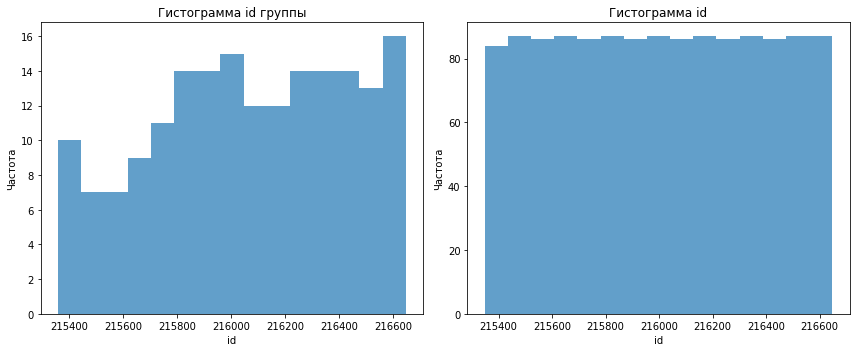

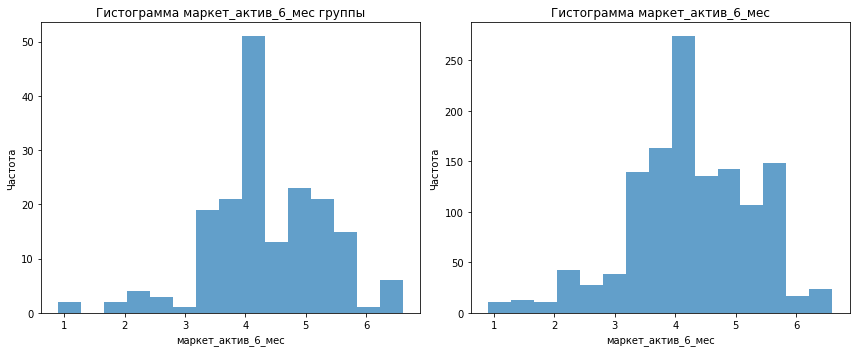

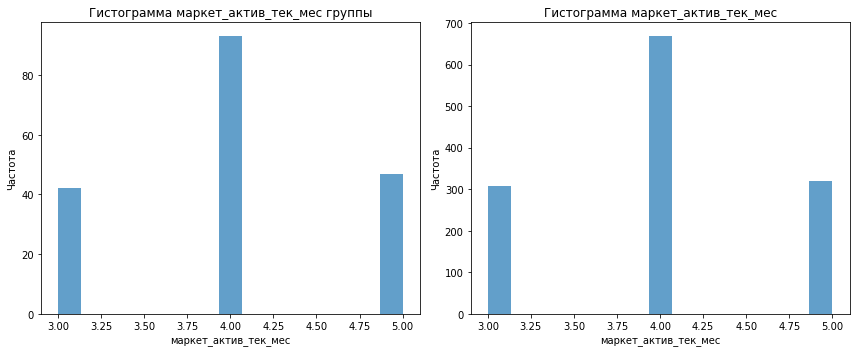

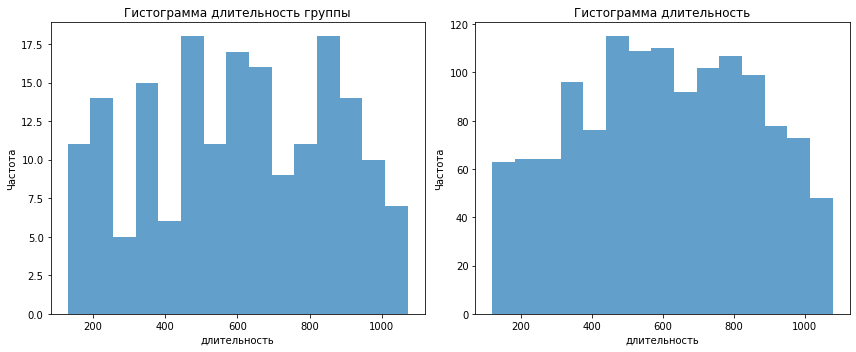

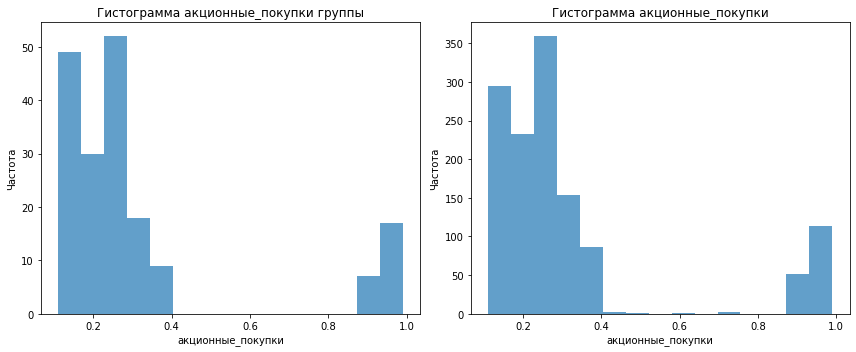

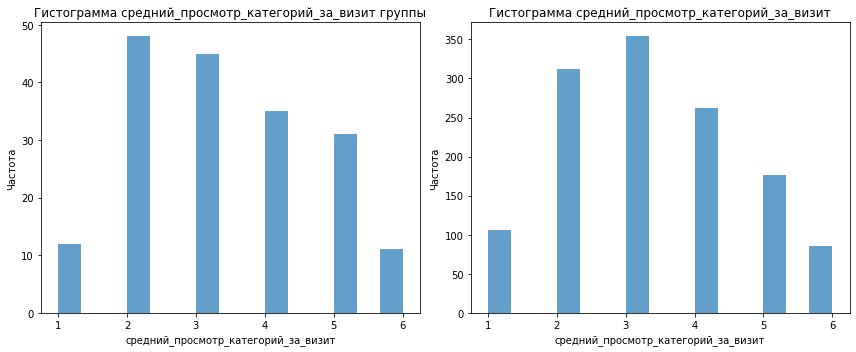

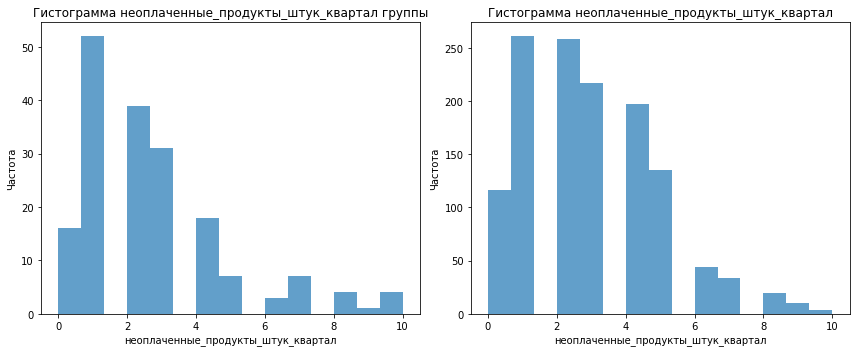

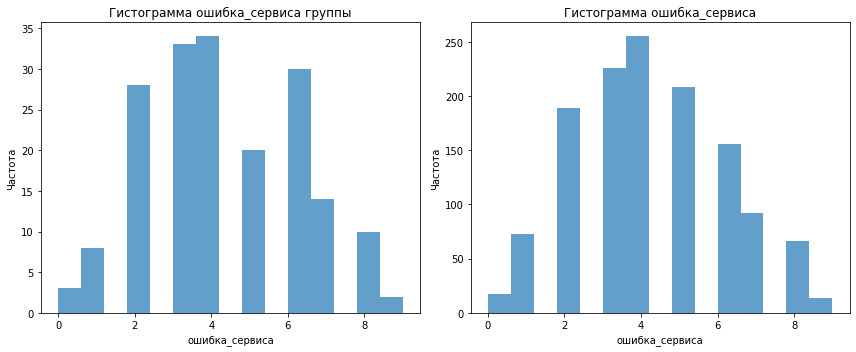

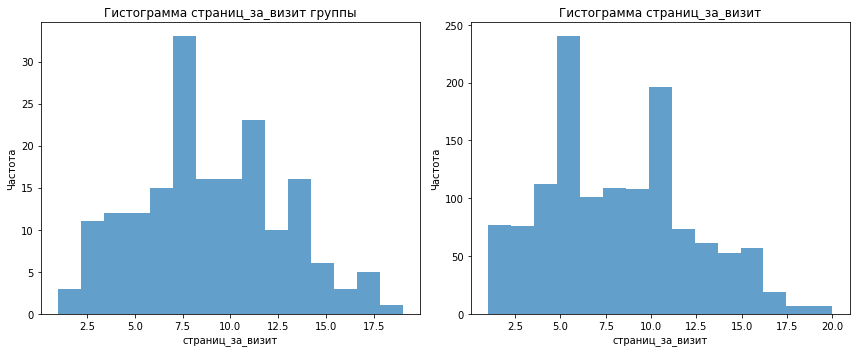

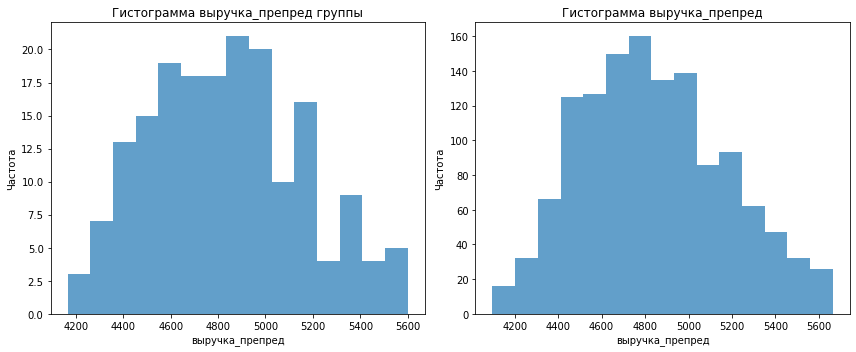

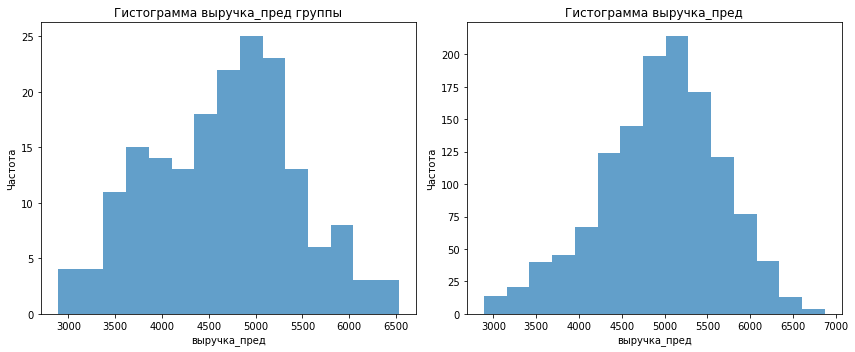

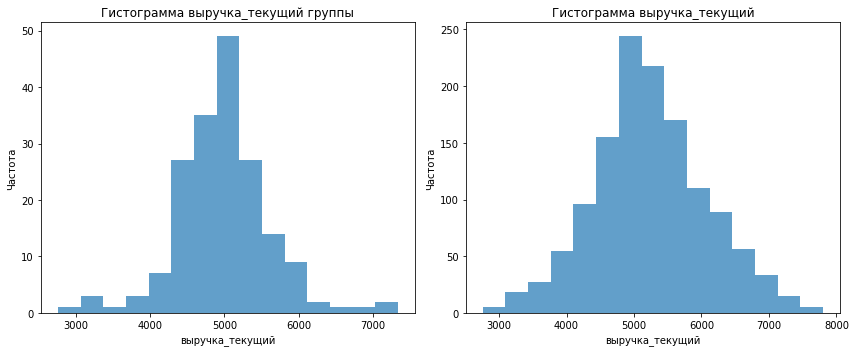

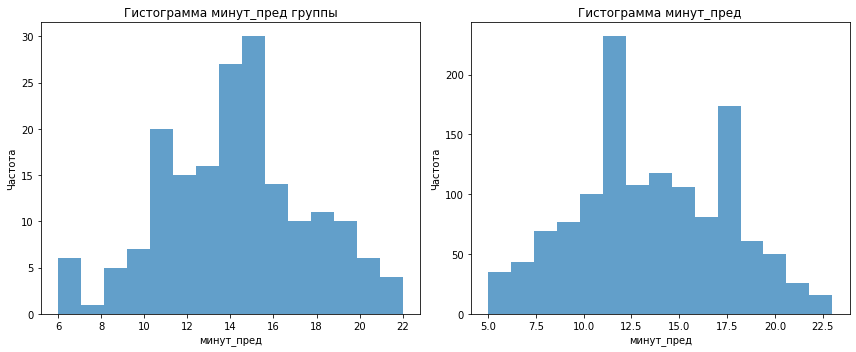

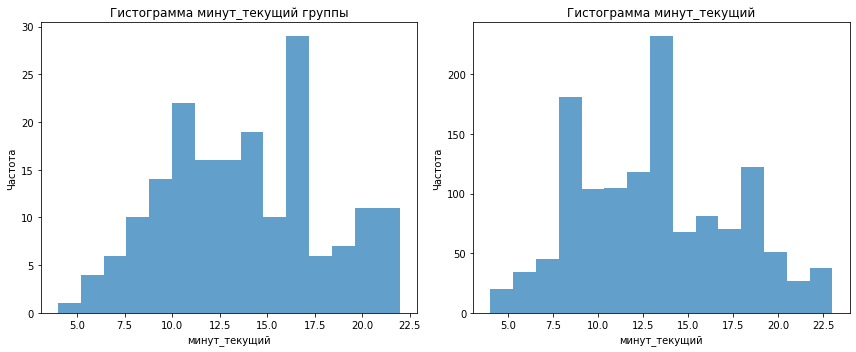

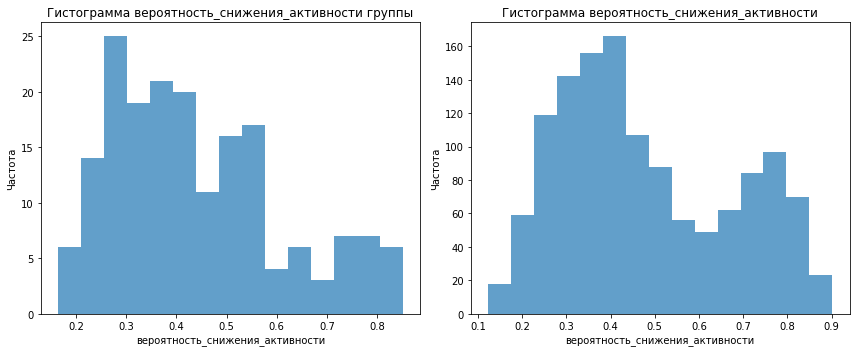

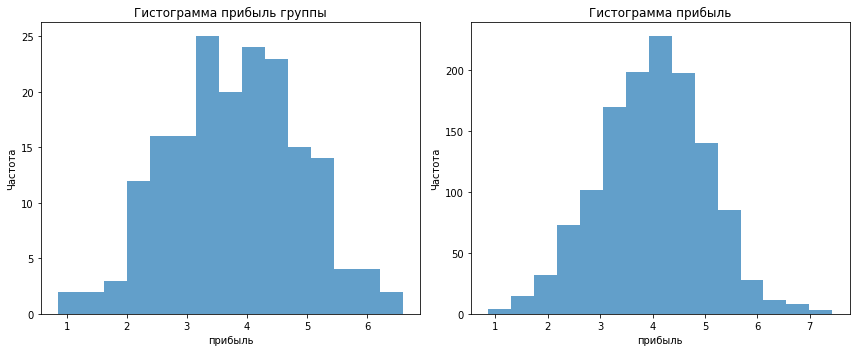

In [82]:
num_hist_group(group2, df, df_num)

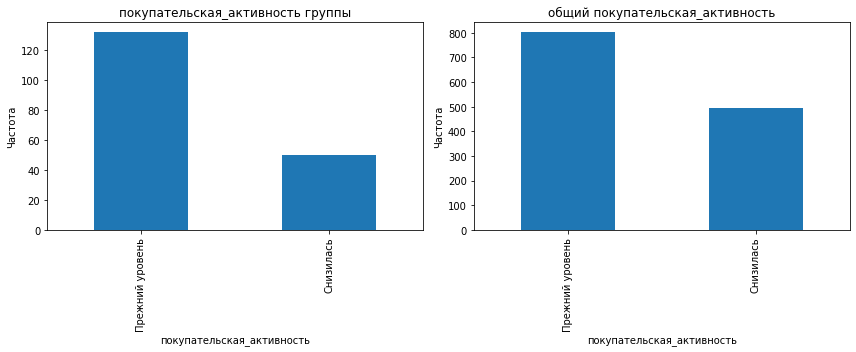

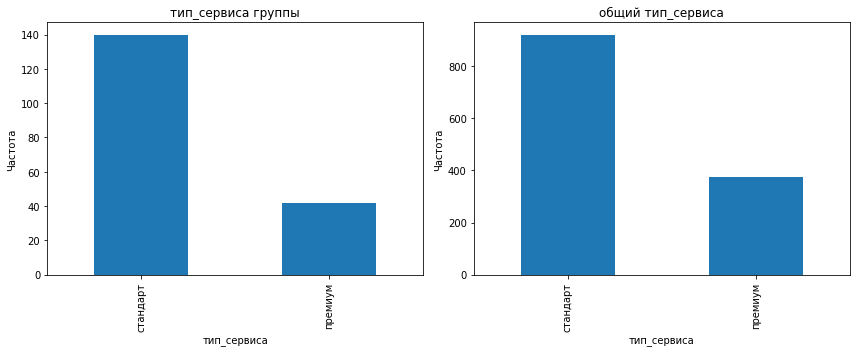

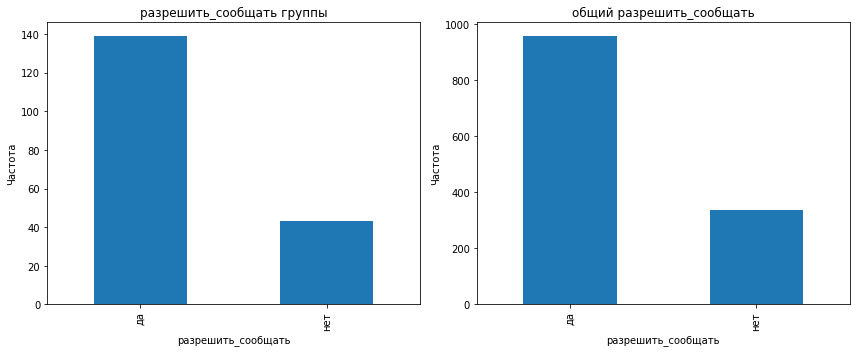

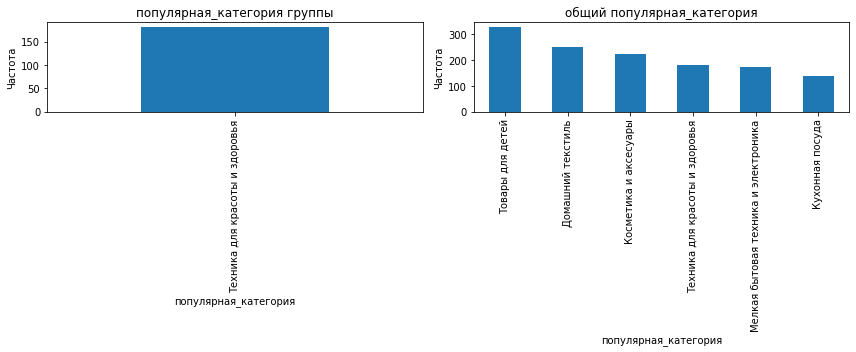

In [83]:
cat_bar(group2, df, df_cat)

–≠—Ç–∞ –≥—Ä—É–ø–ø–∞ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–∞ –≤ —Ç–æ–º, —á—Ç–æ–±—ã –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. –û–¥–Ω–∞–∫–æ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ –∏–∑ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –∏–º–µ—é—Ç —Ç–∏–ø —Å–µ—Ä–≤–∏—Å–∞ "–ø—Ä–µ–º–∏—É–º". –ú–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º –ø—Ä–æ–¥–≤–∏–≥–∞—Ç—å —ç—Ç–æ—Ç —Ç–∏–ø.

3. –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Å–Ω–∏–∂–µ–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –Ω–∞–∏–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π –ø—Ä–∏–±—ã–ª—å–Ω–æ—Å—Ç—å—é. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤ —á–µ–º –æ—Ç–ª–∏—á–∏–µ  –º–µ–∂–¥—É –Ω–∏–º–∏ –∏ –∫–ª–∏–µ–Ω—Ç–∞–º–∏ —Å –≤—ã—Å–æ–∫–æ–π –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å—é

In [84]:
df['–ø—Ä–∏–±—ã–ª—å'].quantile(0.7)

4.55

In [85]:
group3 = df.query('–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ > 0.7 and –ø—Ä–∏–±—ã–ª—å >= 4.3')

In [86]:
group3_ct = df.query('–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ < 0.4 and –ø—Ä–∏–±—ã–ª—å >= 4.3')

In [87]:
group3.describe()

id  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
count     105.000000          105.000000            105.000000    105.000000   
mean   215558.714286            3.380952              4.095238    584.914286   
std       119.470202            1.054942              0.686740    227.646407   
min    215356.000000            0.900000              3.000000    163.000000   
25%    215457.000000            2.700000              4.000000    377.000000   
50%    215555.000000            3.500000              4.000000    616.000000   
75%    215649.000000            4.100000              5.000000    754.000000   
max    215910.000000            5.600000              5.000000   1051.000000   

       –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
count         105.000000                           105.000000   
mean            0.517714                             2.047619   
std             0.312872                             0.881225   
min             0.140000                             1.000000   
25%             0.270000                             1.000000   
50%             0.330000                             2.000000   
75%             0.930000                             3.000000   
max             0.990000                             5.000000   

       –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  \
count                          105.000000      105.000000        105.000000   
mean                             4.200000        3.809524          3.609524   
std                              2.229177        1.845448          1.666960   
min                              0.000000        1.000000          1.000000   
25%                              2.000000        2.000000          2.000000   
50%                              4.000000        3.000000          3.000000   
75%                              6.000000        5.000000          5.000000   
max                             10.000000        8.000000          8.000000   

       –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥  \
count       105.000000    105.000000       105.000000  105.000000   
mean       4555.657143   4950.557143      5224.621905    9.228571   
std         222.319712    810.412951       912.568274    2.262815   
min        4105.000000   2960.000000      3078.300000    5.000000   
25%        4410.000000   4397.000000      4458.900000    8.000000   
50%        4556.000000   5059.000000      5385.000000    9.000000   
75%        4723.000000   5567.000000      5985.500000   11.000000   
max        5025.000000   6399.500000      6957.700000   14.000000   

       –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π  –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å_—Å–Ω–∏–∂–µ–Ω–∏—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏     –ø—Ä–∏–±—ã–ª—å  
count     105.000000                       105.000000  105.000000  
mean        9.904762                         0.772944    4.972095  
std         2.314352                         0.051225    0.577374  
min         4.000000                         0.700409    4.300000  
25%         8.000000                         0.732029    4.550000  
50%        10.000000                         0.765676    4.850000  
75%        11.000000                         0.802950    5.160000  
max        17.000000                         0.901797    7.430000

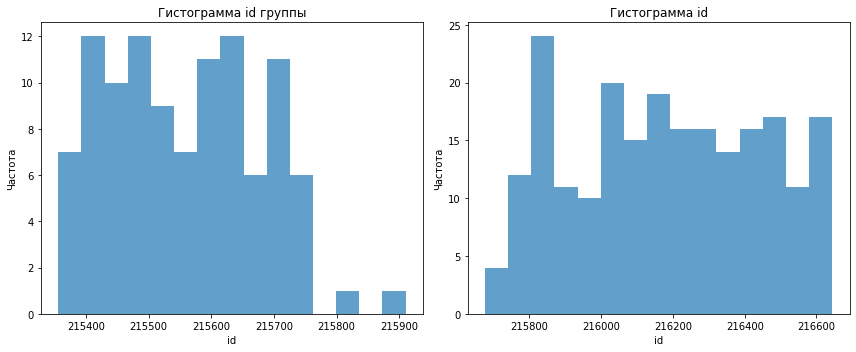

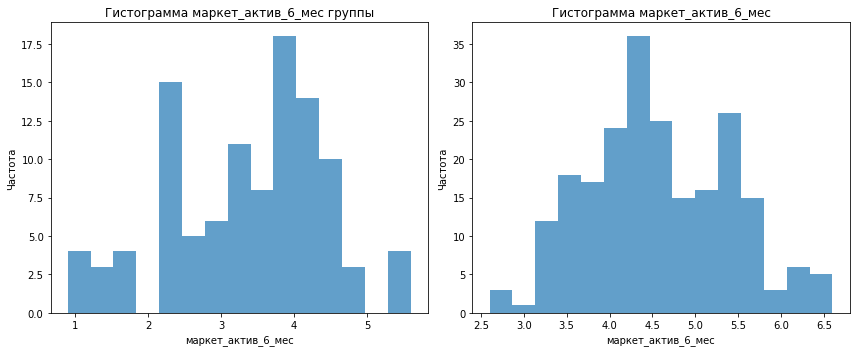

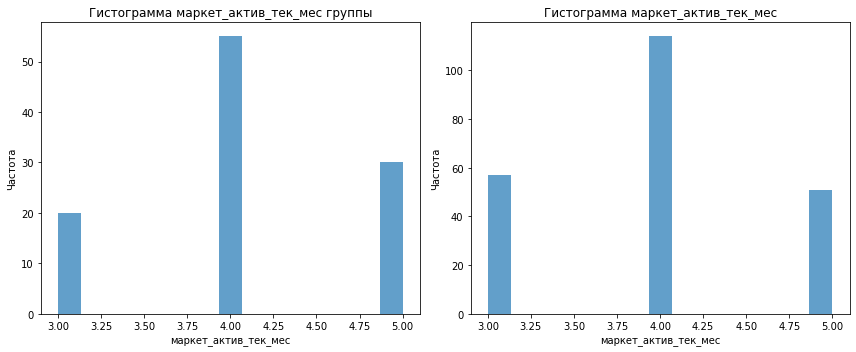

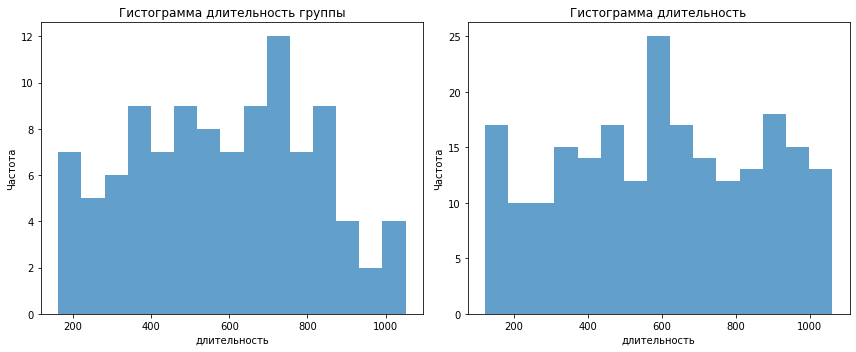

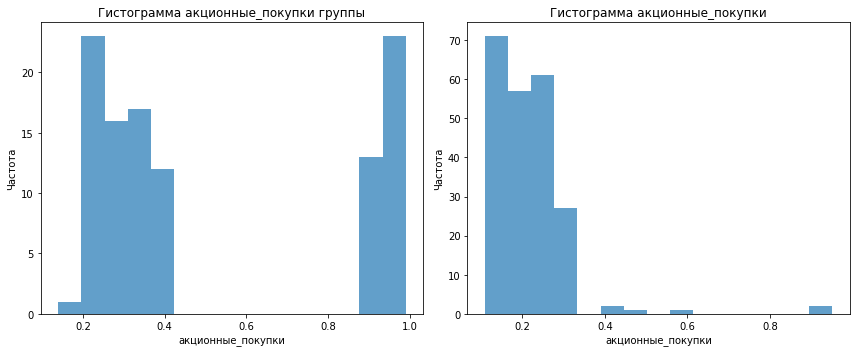

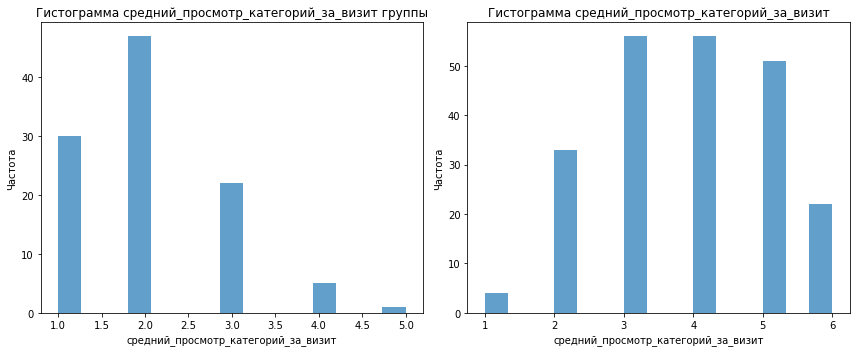

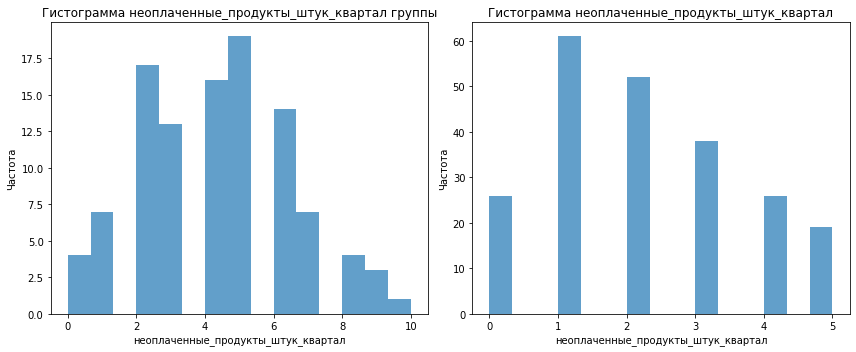

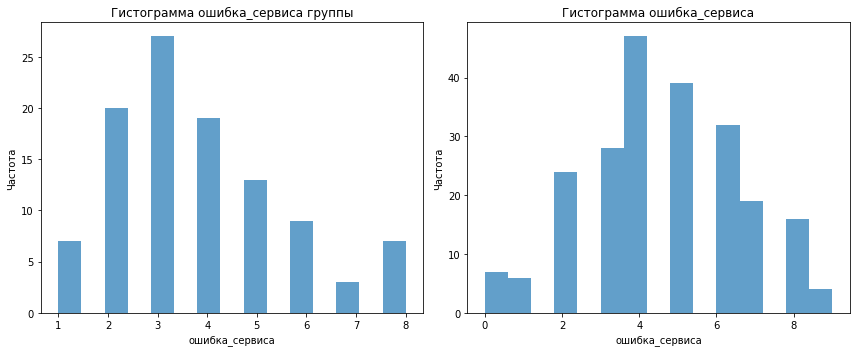

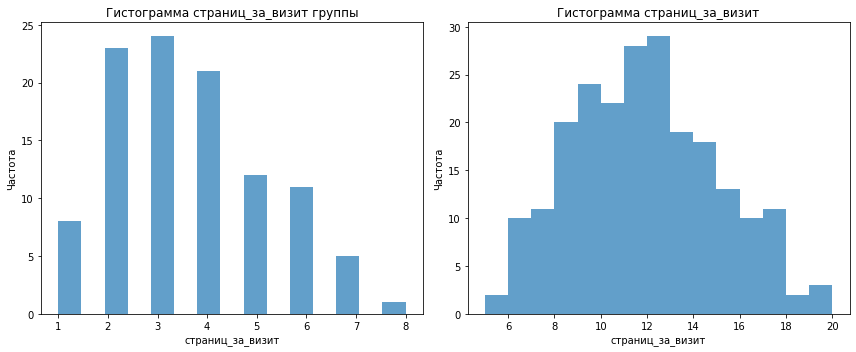

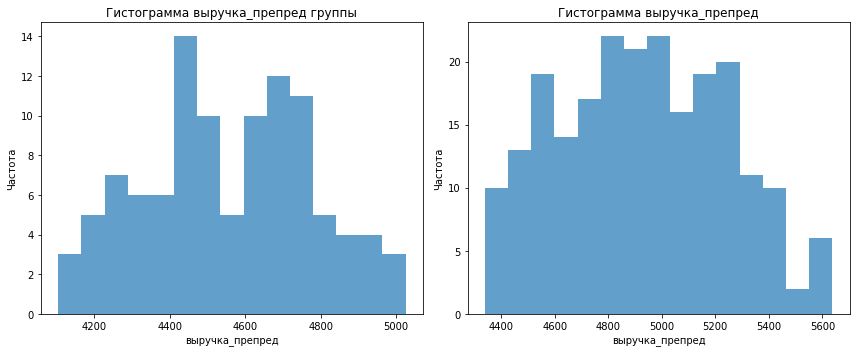

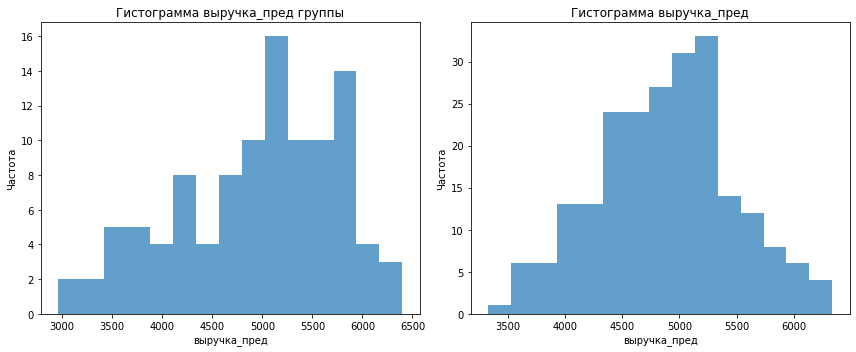

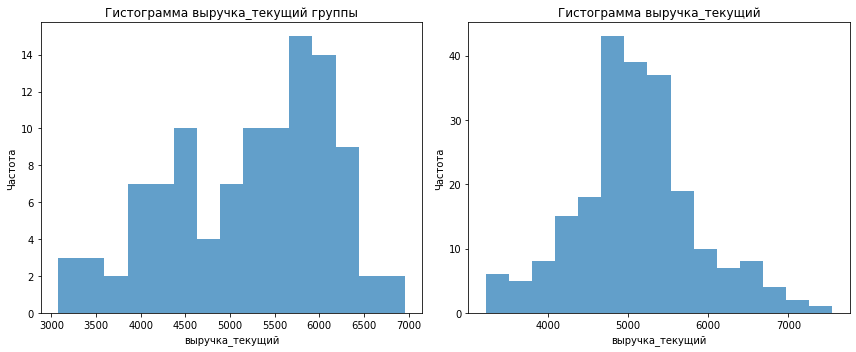

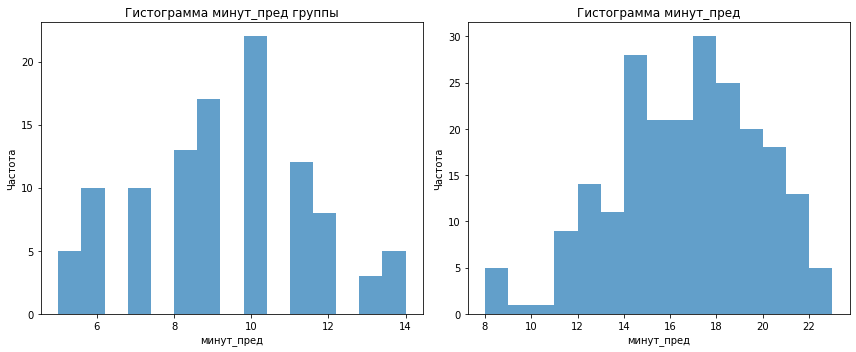

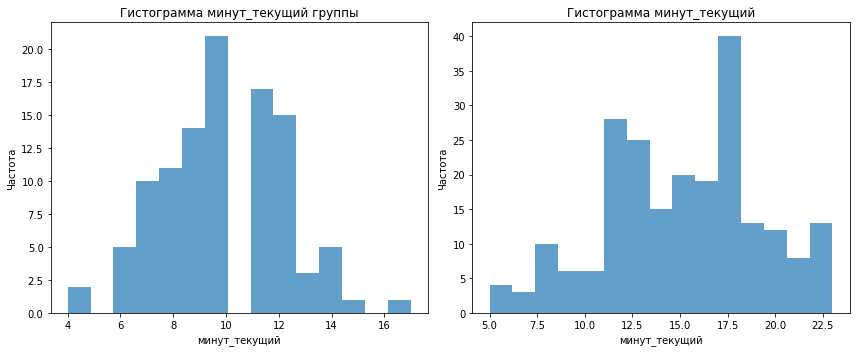

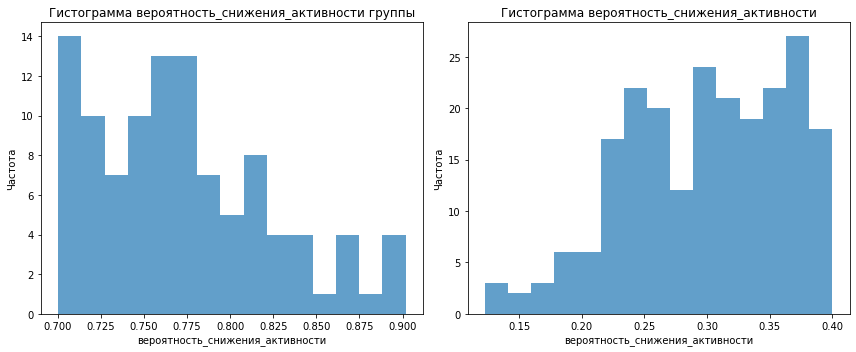

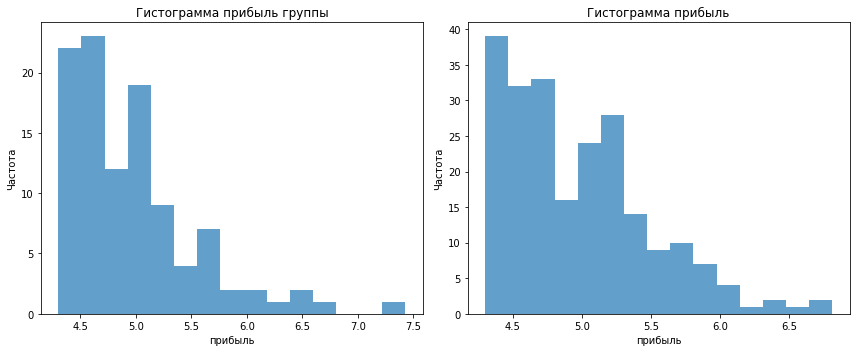

In [88]:
num_hist_group(group3, group3_ct, df_num)

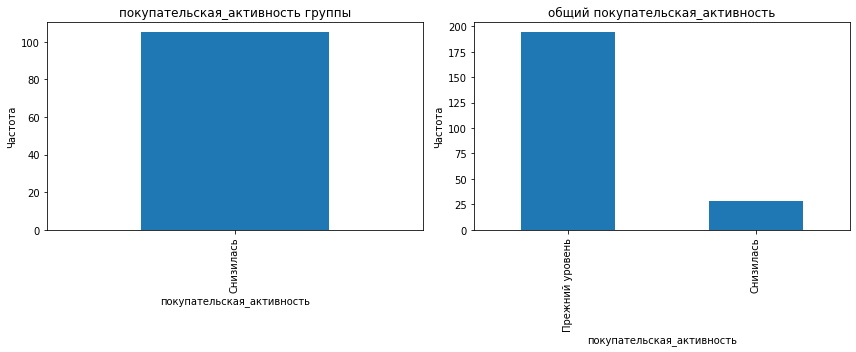

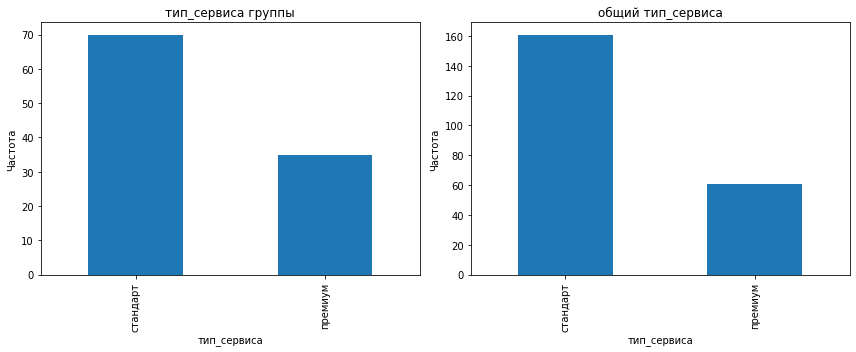

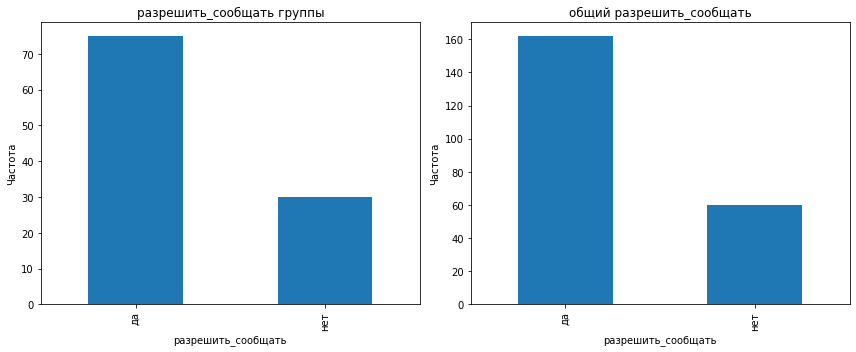

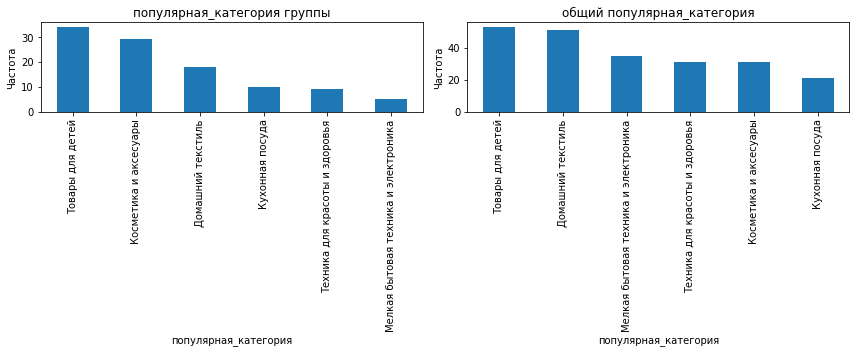

In [89]:
cat_bar_group(group3, group3_ct, df_cat)

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–∏–±—ã–ª–∏ –ø—Ä–∏–Ω–æ—Å—è—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏, –ø–æ–∫—É–ø–∞—é—â–∏–µ —Ç–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π –∏ –∫–æ—Å–º–µ—Ç–∏–∫—É —Å –∞–∫—Å–µ—Å—É–∞—Ä–∞–º–∏. –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã —Ç–∞–∫–∂–µ –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç –º–µ–Ω—å—à–µ —Ç–æ–≤–∞—Ä–æ–≤, –ø–æ—Å–µ—â–∞—è —Å–∞–π—Ç. –í–µ—Ä–æ—è—Ç–Ω–æ, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –Ω–µ —Å–º–æ–≥–ª–∏ –Ω–∞–π—Ç–∏ –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –¥–ª—è –Ω–∏—Ö —Ç–æ–≤–∞—Ä—ã, –ª–∏–±–æ —Ü–µ–Ω–∞ –∏—Ö –Ω–µ—É—Å—Ç—Ä–∞–∏–≤–∞–ª–∞. –°–ª–µ–¥—É–µ—Ç —Ä–∞—Å—à–∏—Ä–∏—Ç—å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –≤ —ç—Ç–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö, –≤–µ–¥—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—â–∏—Ö –ø–æ–∫—É–ø–∞—Ç—å –¥–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å –∫—É–¥–∞ –±–æ–ª—å—à–µ —É—Å—Ç—Ä–∞–∏–≤–∞—é—Ç —É—Å–ª–æ–≤–∏—è

## –û–±—â–∏–π –≤—ã–≤–æ–¥


–¢—Ä–µ–±–æ–≤–∞–ª–æ—Å—å –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å, —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—â—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–Ω–∏–∂–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

–î–ª—è —ç—Ç–æ–≥–æ –≤ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –¥–æ–±–∞–≤–ª–µ–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ —Å–º–µ–∂–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–µ –ø—Ä–∏–±—ã–ª—å –∏ –≤—Ä–µ–º—è –ø—Ä–µ–±—ã–≤–∞–Ω–∏—è –Ω–∞ —Å–∞–π—Ç–µ –≤ —Ç–µ–∫—É—â–∏–π –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã.

–ö–æ—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—è—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –ø–æ–¥—Ö–æ–¥—è—â—É—é –º–æ–¥–µ–ª—å, –±—ã–ª–∏ –ø–µ—Ä–µ–±—Ä–∞–Ω—ã –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, k –±–ª–∏–∂–∞–π—à–∏–∑ —Å–æ—Å–µ–¥–µ–π, –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, –¥—Ä—É–≥–∏–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö.

–ù–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –¥–ª—è –∑–∞–¥–∞—á–∏ –æ–∫–∞–∑–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å l1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º C=0.01. 

–ü–æ—Å–ª–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Å–Ω–∏–∂–µ–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –±—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å—Ö–æ–∂–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫. –ë—ã–ª —Å–¥–µ–ª–∞–Ω –≤—ã–≤–æ–¥, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –≥—Ä—É–ø–ø –º–æ–∂–Ω–æ –ø—Ä–∏–≤–ª–µ—á—å –±–æ–ª–µ–µ –≤—ã–≥–æ–¥–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –ø—Ä–æ–¥–∞–∂–∏ –∏—Ö –ª—é–±–∏–º—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–æ–≤.